In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit

In [24]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [25]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
dfn = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Transfer Learning\\Intel-To-ARM\\AMD.csv')
df = pd.read_csv( 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Transfer Learning\\Intel-To-ARM\\INTEL.csv')

In [26]:
df.head()

arch  cpu-clock     isa  l1d_assoc  \
0  IntelCorei36100U_DDR41866_2GB        2.3  X86_64          8   
1  IntelCorei36100U_DDR41866_2GB        2.3  X86_64          8   
2  IntelCorei36100U_DDR41866_2GB        2.3  X86_64          8   
3  IntelCorei36100U_DDR41866_2GB        2.3  X86_64          8   
4  IntelCorei36100U_DDR41866_2GB        2.3  X86_64          8   

   l1d_cache_lines  l1d_shared_by_threads  l1d_size  l2_assoc  l2_cache_lines  \
0               64                      1        32         4              64   
1               64                      1        32         4              64   
2               64                      1        32         4              64   
3               64                      1        32         4              64   
4               64                      1        32         4              64   

   l2_shared_by_threads  ...  l3_cache_lines  l3_shared_by_threads  l3_size  \
0                     1  ...              64                     2        3   
1                     1  ...              64                     2        3   
2                     1  ...              64                     2        3   
3                     1  ...              64                     2        3   
4                     1  ...              64                     2        3   

   mem-size  mem-type  mem_clock num-cpus    PS  runtime    power  
0         2      DDR4       1866        2  1000      584  5.56428  
1         2      DDR4       1866        2  2000     1230  5.70416  
2         2      DDR4       1866        2  3000     1929  5.63798  
3         2      DDR4       1866        2  4000     2653  5.61658  
4         2      DDR4       1866        2  5000     3409  5.58136  

[5 rows x 22 columns]

In [27]:
dfn.head()

arch  cpu-clock     isa  l1d_assoc  \
0  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6  X86_64          4   
1  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6  X86_64          4   
2  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6  X86_64          4   
3  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6  X86_64          4   
4  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6  X86_64          4   

   l1d_cache_lines  l1d_shared_by_threads  l1d_size  l2_assoc  l2_cache_lines  \
0               64                      1        16        16              64   
1               64                      1        16        16              64   
2               64                      1        16        16              64   
3               64                      1        16        16              64   
4               64                      1        16        16              64   

   l2_shared_by_threads  ...  l3_cache_lines  l3_shared_by_threads  l3_size  \
0                     1  ...              64                     4        4   
1                     1  ...              64                     4        4   
2                     1  ...              64                     4        4   
3                     1  ...              64                     4        4   
4                     1  ...              64                     4        4   

   mem-size  mem-type  mem_clock num-cpus    PS  runtime    power  
0         2      DDR3       1866        4  1000      419  1.06413  
1         2      DDR3       1866        4  2000      866  1.08300  
2         2      DDR3       1866        4  3000     1318  1.09014  
3         2      DDR3       1866        4  4000     1775  1.09561  
4         2      DDR3       1866        4  5000     2249  1.09723  

[5 rows x 22 columns]

In [28]:
df.columns, len(df.columns), dfn.columns, len(dfn.columns) # bus-speed is extra in physical

(Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'PS', 'runtime', 'power'],
       dtype='object'),
 22,
 Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'PS', 'runtime', 'power'],
       dtype='object'),
 22)

In [32]:
len(df),len(dfn)

(1440, 570)

In [33]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [34]:
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

In [35]:
encoded_data_frame.head()

arch  cpu-clock  isa_1  l1d_assoc  \
0  IntelCorei36100U_DDR41866_2GB        2.3      1          8   
1  IntelCorei36100U_DDR41866_2GB        2.3      1          8   
2  IntelCorei36100U_DDR41866_2GB        2.3      1          8   
3  IntelCorei36100U_DDR41866_2GB        2.3      1          8   
4  IntelCorei36100U_DDR41866_2GB        2.3      1          8   

   l1d_cache_lines  l1d_shared_by_threads  l1d_size  l2_assoc  l2_cache_lines  \
0               64                      1        32         4              64   
1               64                      1        32         4              64   
2               64                      1        32         4              64   
3               64                      1        32         4              64   
4               64                      1        32         4              64   

   l2_shared_by_threads  ...  l3_size  mem-size  mem-type_1  mem-type_2  \
0                     1  ...        3         2           1           0   
1                     1  ...        3         2           1           0   
2                     1  ...        3         2           1           0   
3                     1  ...        3         2           1           0   
4                     1  ...        3         2           1           0   

   mem-type_3  mem_clock  num-cpus    PS  runtime    power  
0           0       1866         2  1000      584  5.56428  
1           0       1866         2  2000     1230  5.70416  
2           0       1866         2  3000     1929  5.63798  
3           0       1866         2  4000     2653  5.61658  
4           0       1866         2  5000     3409  5.58136  

[5 rows x 24 columns]

In [36]:
encoded_data_frame_n.head()

arch  cpu-clock  isa_1  l1d_assoc  \
0  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6      1          4   
1  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6      1          4   
2  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6      1          4   
3  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6      1          4   
4  AdvMicDevBuldzrFX4100_DDR31866_2GB        3.6      1          4   

   l1d_cache_lines  l1d_shared_by_threads  l1d_size  l2_assoc  l2_cache_lines  \
0               64                      1        16        16              64   
1               64                      1        16        16              64   
2               64                      1        16        16              64   
3               64                      1        16        16              64   
4               64                      1        16        16              64   

   l2_shared_by_threads  ...  l3_shared_by_threads  l3_size  mem-size  \
0                     1  ...                     4        4         2   
1                     1  ...                     4        4         2   
2                     1  ...                     4        4         2   
3                     1  ...                     4        4         2   
4                     1  ...                     4        4         2   

   mem-type_1  mem-type_2  mem_clock  num-cpus    PS  runtime    power  
0           1           0       1866         4  1000      419  1.06413  
1           1           0       1866         4  2000      866  1.08300  
2           1           0       1866         4  3000     1318  1.09014  
3           1           0       1866         4  4000     1775  1.09561  
4           1           0       1866         4  5000     2249  1.09723  

[5 rows x 23 columns]

In [37]:
encoded_data_frame.columns, len(encoded_data_frame.columns)

(Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
        'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
        'power'],
       dtype='object'), 24)

In [38]:
encoded_data_frame_n.columns, len(encoded_data_frame_n.columns)

(Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
        'mem-type_2', 'mem_clock', 'num-cpus', 'PS', 'runtime', 'power'],
       dtype='object'), 23)

In [39]:
total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2' ])

In [40]:
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3'])

In [41]:
total_data.columns, total_data_n.columns

(Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem_clock', 'num-cpus',
        'PS', 'runtime', 'power'],
       dtype='object'),
 Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem_clock', 'num-cpus',
        'PS', 'runtime', 'power'],
       dtype='object'))

In [42]:
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

In [43]:
X_Intel = total_data.drop(columns = ['runtime','power']).to_numpy()
Y_Intel = total_data[['runtime','power']].to_numpy()

In [44]:
X_ARM = total_data_n.drop(columns = ['runtime','power']).to_numpy()
Y_ARM = total_data_n[['runtime','power']].to_numpy()

# Train -> Intel Data 
# Test -> ARM data

In [45]:
X_Intel.shape, X_ARM.shape, Y_Intel.shape, Y_ARM.shape

((1440, 18), (570, 18), (1440, 2), (570, 2))

In [46]:
Y_Intel[:10], Y_ARM[:10] 

(array([[ 584.     ,    5.56428],
        [1230.     ,    5.70416],
        [1929.     ,    5.63798],
        [2653.     ,    5.61658],
        [3409.     ,    5.58136],
        [3902.     ,    5.51593],
        [ 584.     ,    5.56428],
        [1230.     ,    5.70416],
        [1929.     ,    5.63798],
        [2653.     ,    5.61658]]), array([[4.19000e+02, 1.06413e+00],
        [8.66000e+02, 1.08300e+00],
        [1.31800e+03, 1.09014e+00],
        [1.77500e+03, 1.09561e+00],
        [2.24900e+03, 1.09723e+00],
        [2.57800e+03, 1.09313e+00],
        [4.19000e+02, 1.06413e+00],
        [8.66000e+02, 1.08300e+00],
        [1.31800e+03, 1.09014e+00],
        [1.77500e+03, 1.09561e+00]]))

 # Appending 1% data of ARM in Intel Data (X_train and Y_train)

In [47]:
# Separating ARM data to 1% and 99%
X_train_ARM, X_test_ARM, Y_train_ARM, Y_test_ARM = train_test_split(X_ARM, Y_ARM, test_size = 0.99, random_state=42)
print(X_train_ARM.shape, X_test_ARM.shape, Y_train_ARM.shape, Y_test_ARM.shape)
X_train_Intel = np.append(X_Intel, X_train_ARM,axis = 0)
Y_train_Intel = np.append(Y_Intel, Y_train_ARM,axis = 0)
print(X_train_Intel.shape, Y_train_Intel.shape, X_test_ARM.shape, Y_test_ARM.shape)

(5, 18) (565, 18) (5, 2) (565, 2)
(1445, 18) (1445, 2) (565, 18) (565, 2)


In [48]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_train_Intel = scaler_x.fit_transform(X_train_Intel)
X_test_ARM = scaler_x.fit_transform(X_test_ARM)
# Y_train_Intel = np.reshape(Y_train_Intel, (len(Y_train_Intel),1))
# Y_test_ARM = np.reshape(Y_test_ARM, (len(Y_test_ARM),1))
Y_train_Intel = scaler_y.fit_transform(Y_train_Intel)
Y_test_ARM = scaler_y.fit_transform(Y_test_ARM)

In [49]:
X_train = X_train_Intel
X_test = X_test_ARM
Y_train = Y_train_Intel
Y_test = Y_test_ARM
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1445, 18), (565, 18), (1445, 2), (565, 2))

In [50]:
# Y_train = np.reshape(Y_train, (Y_train.shape[0], ))
print(Y_train.shape)

(1445, 2)


In [51]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

# 2. Linear Regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] fit_intercept=True, normalize=True ..............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .. fit_intercept=True, normalize=True, score=0.890, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] fit_intercept=True, normalize=True ..............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] .. fit_intercept=True, normalize=True, score=0.926, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] fit_intercept=True, normalize=True ..............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  fit_intercept=True, normalize=True, score=-497046733197117604534075977674293060655370077292462080.000, total=   0.0s
[CV] fit_intercept=True, normalize=False .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . fit_intercept=True, normalize=False, score=0.875, total=   0.0s
[CV] fit_intercept=True, normalize=False .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . fit_intercept=True, normalize=False, score=0.926, total=   0.0s
[CV] fit_intercept=True, normalize=False .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  fit_intercept=True, normalize=False, score=-1246104980527743179423744.000, total=   0.0s
[CV] fit_intercept=False, normalize=True .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . fit_intercept=False, normalize=True, score=0.935, total=   0.0s
[CV] fit_intercept=False, normalize=True .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . fit_intercept=False, normalize=True, score=0.959, total=   0.0s
[CV] fit_intercept=False, normalize=True .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  fit_intercept=False, normalize=True, score=-41577617574912277348352.000, total=   0.0s
[CV] fit_intercept=False, normalize=False ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  fit_intercept=False, normalize=False, score=0.935, total=   0.0s
[CV] fit_intercept=False, normalize=False ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  fit_intercept=False, normalize=False, score=0.959, total=   0.0s
[CV] fit_intercept=False, normalize=False ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  fit_intercept=False, normalize=False, score=-41577617574912277348352.000, total=   0.0s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'fit_intercept': False, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
MSE =  0.24091573139754302
R2 score = 0.7590842686024567


"\nprint('\nMean Absolute Percentage Error Runtime =',absolute_percentage_error(Y_test[:,0], Y_pred[:,0]))\nprint('\nMean Absolute Percentage Error Power =',absolute_percentage_error(Y_test[:,1], Y_pred[:,1]))\nprint('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))"

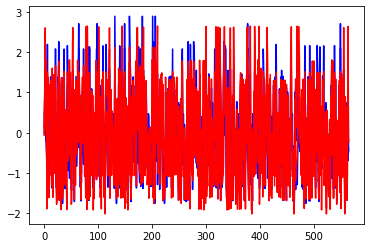

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# defining parameter range 
param_grid = {'fit_intercept': [True, False],  
             'normalize' : [True, False], 
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
'''
print('\nMean Absolute Percentage Error Runtime =',absolute_percentage_error(Y_test[:,0], Y_pred[:,0]))
print('\nMean Absolute Percentage Error Power =',absolute_percentage_error(Y_test[:,1], Y_pred[:,1]))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))'''

# Transfer Learning

MSE: 
 41776.67431654259

R2: 
 0.759084268602457

MAPE:Runtime 
 0.18282506221114803

MAPE:Power 
 0.16921516253730212


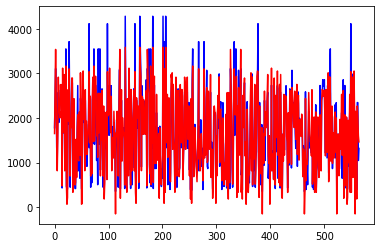

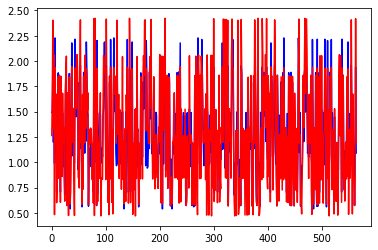

In [53]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.svm import SVR
best_lr = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
best_lr.fit(X_train, Y_train)
Y_pred = best_lr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold[:,0], 'b')
plt.plot(Y_pred[:,0], 'r')
plt.figure()
plt.plot(Y_fold[:,1], 'b')
plt.plot(Y_pred[:,1], 'r')

r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))

print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE:Runtime \n', mape_scores_runtime)
print('\nMAPE:Power \n', mape_scores_power)


In [54]:
X_train.shape, Y_train.shape

((1445, 18), (1445, 2))

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=auto, score=0.817, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=auto, score=0.920, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=auto, score=-7.325, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=svd, score=0.817, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=svd, score=0.920, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=svd, score=-4.526, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky, score=0.817, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky, score=0.920, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky, score=-7.325, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=lsqr, score=0.817, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=lsqr, score=0.920, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=lsqr, score=-8468364.401, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=sparse_cg, score=0.817, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=sparse_cg, score=0.920, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=sparse_cg, score=-8897435.307, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=sag, score=0.816, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=sag, score=0.920, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=sag, score=-55360912917045098577920.000, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=saga, score=0.816, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=saga, score=0.922, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=saga, score=-262373405934999440457728.000, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=auto, score=0.895, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=auto, score=0.925, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=auto, score=0.863, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=svd, score=0.895, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=svd, score=0.925, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=svd, score=0.863, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=cholesky, score=0.895, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=cholesky, score=0.925, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=cholesky, score=0.863, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=lsqr, score=0.889, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=lsqr, score=0.931, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=lsqr, score=0.862, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.889, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.897, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.862, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=sag, score=0.871, total=   0.2s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=sag, score=0.901, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=sag, score=0.863, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=saga, score=0.844, total=   0.2s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=saga, score=0.904, total=   0.1s
[CV] alpha=0.1, fit_intercept=True, normalize=False, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=True, normalize=False, solver=saga, score=0.863, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=auto, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=auto, score=0.959, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=auto, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=svd, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=svd, score=0.959, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=svd, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=cholesky, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=cholesky, score=0.959, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=cholesky, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=lsqr, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=lsqr, score=0.957, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=lsqr, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.957, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.452, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=sag, score=0.942, total=   0.3s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=sag, score=0.954, total=   0.1s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=sag, score=0.444, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=saga, score=0.945, total=   0.3s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=saga, score=0.949, total=   0.2s
[CV] alpha=0.1, fit_intercept=False, normalize=True, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=True, solver=saga, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=auto, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=auto, score=0.959, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=auto, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=svd, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=svd, score=0.959, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=svd, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=cholesky, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=cholesky, score=0.959, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=cholesky, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=lsqr, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=lsqr, score=0.957, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=lsqr, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.936, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.957, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.452, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=sag, score=0.942, total=   0.3s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=sag, score=0.953, total=   0.1s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=sag, score=0.445, total=   0.0s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=saga, score=0.945, total=   0.3s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=saga, score=0.949, total=   0.2s
[CV] alpha=0.1, fit_intercept=False, normalize=False, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=0.1, fit_intercept=False, normalize=False, solver=saga, score=0.445, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=auto ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=auto, score=0.537, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=auto ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=auto, score=0.661, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=auto ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=auto, score=-3.514, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=svd .........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=svd, score=0.537, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=svd .........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=svd, score=0.661, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=svd .........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=svd, score=-1.853, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=cholesky ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=cholesky, score=0.537, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=cholesky ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=cholesky, score=0.661, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=cholesky ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=cholesky, score=-3.514, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=lsqr ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=lsqr, score=0.537, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=lsqr ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=lsqr, score=0.661, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=lsqr ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=lsqr, score=-9.969, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=sparse_cg ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sparse_cg, score=0.537, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=sparse_cg ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sparse_cg, score=0.661, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=sparse_cg ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sparse_cg, score=-8.555, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=sag .........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sag, score=0.538, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=sag .........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sag, score=0.661, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=sag .........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sag, score=-12669489345103700951040.000, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=saga ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=saga, score=0.538, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=saga ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=saga, score=0.661, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=saga ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=True, solver=saga, score=-51354894244053012971520.000, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=auto .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=auto, score=0.884, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=auto .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=auto, score=0.919, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=auto .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=auto, score=0.865, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=svd ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=svd, score=0.884, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=svd ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=svd, score=0.919, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=svd ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=svd, score=0.865, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=cholesky ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=cholesky, score=0.884, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=cholesky ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=cholesky, score=0.919, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=cholesky ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=cholesky, score=0.865, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=lsqr .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=lsqr, score=0.879, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=lsqr .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=lsqr, score=0.924, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=lsqr .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=lsqr, score=0.865, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=sparse_cg ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.879, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=sparse_cg ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.897, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=sparse_cg ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.865, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=sag ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=sag, score=0.861, total=   0.2s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=sag ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=sag, score=0.898, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=sag ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=sag, score=0.865, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=saga .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=saga, score=0.839, total=   0.1s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=saga .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=saga, score=0.903, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=saga .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=True, normalize=False, solver=saga, score=0.865, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=auto .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=auto, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=auto .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=auto, score=0.957, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=auto .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=auto, score=0.468, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=svd ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=svd, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=svd ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=svd, score=0.957, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=svd ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=svd, score=0.468, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=cholesky ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=cholesky, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=cholesky ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=cholesky, score=0.957, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=cholesky ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=cholesky, score=0.468, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=lsqr .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=lsqr, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=lsqr .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=lsqr, score=0.955, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=lsqr .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=lsqr, score=0.468, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=sparse_cg ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=sparse_cg ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.955, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=sparse_cg ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.473, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=sag ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=sag, score=0.945, total=   0.2s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=sag ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=sag, score=0.952, total=   0.1s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=sag ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=sag, score=0.469, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=saga .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=saga, score=0.946, total=   0.3s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=saga .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=saga, score=0.948, total=   0.2s
[CV] alpha=1, fit_intercept=False, normalize=True, solver=saga .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=True, solver=saga, score=0.468, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=auto, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=auto, score=0.957, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=auto, score=0.468, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=svd, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=svd, score=0.957, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=svd, score=0.468, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=cholesky, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=cholesky, score=0.957, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=cholesky, score=0.468, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=lsqr, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=lsqr, score=0.955, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=lsqr, score=0.468, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.941, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.955, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.473, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=sag, score=0.945, total=   0.3s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=sag, score=0.952, total=   0.1s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=sag, score=0.466, total=   0.0s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=saga, score=0.946, total=   0.2s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=saga, score=0.948, total=   0.2s
[CV] alpha=1, fit_intercept=False, normalize=False, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1, fit_intercept=False, normalize=False, solver=saga, score=0.468, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=auto .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=auto, score=-0.295, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=auto .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=auto, score=0.002, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=auto .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=auto, score=0.047, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=svd ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=svd, score=-0.295, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=svd ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=svd, score=0.002, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=svd ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=svd, score=0.125, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=cholesky ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=cholesky, score=-0.295, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=cholesky ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=cholesky, score=0.002, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=cholesky ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=cholesky, score=0.047, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=lsqr .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=lsqr, score=-0.295, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=lsqr .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=lsqr, score=0.002, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=lsqr .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=lsqr, score=0.049, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=sparse_cg ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=sparse_cg, score=-0.295, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=sparse_cg ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=sparse_cg, score=0.002, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=sparse_cg ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=sparse_cg, score=0.061, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=sag ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=sag, score=-0.296, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=sag ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=sag, score=0.002, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=sag ........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=sag, score=-20072814740074789863424.000, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=saga .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=saga, score=-0.295, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=saga .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=saga, score=0.002, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=True, solver=saga .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=True, solver=saga, score=-233041851600904257536.000, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=auto, score=0.840, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=auto, score=0.908, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=auto, score=0.869, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=svd, score=0.840, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=svd, score=0.908, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=svd, score=0.869, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=cholesky, score=0.840, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=cholesky, score=0.908, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=cholesky, score=0.869, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=lsqr, score=0.839, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=lsqr, score=0.909, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=lsqr, score=0.869, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.838, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.901, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.869, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sag, score=0.830, total=   0.1s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sag, score=0.902, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sag, score=0.869, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=saga, score=0.820, total=   0.1s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=saga, score=0.907, total=   0.1s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=True, normalize=False, solver=saga, score=0.869, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=auto, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=auto, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=auto, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=svd, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=svd, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=svd, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=cholesky, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=cholesky, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=cholesky, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=lsqr, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=lsqr, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=lsqr, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.618, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=sag, score=0.948, total=   0.2s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=sag, score=0.945, total=   0.1s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=sag, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=saga, score=0.947, total=   0.1s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=saga, score=0.943, total=   0.1s
[CV] alpha=10, fit_intercept=False, normalize=True, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=True, solver=saga, score=0.616, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=auto, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=auto, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=auto, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=svd, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=svd, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=svd, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=cholesky, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=cholesky, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=cholesky, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=lsqr, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=lsqr, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=lsqr, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.948, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.947, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.618, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=sag, score=0.948, total=   0.1s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=sag, score=0.945, total=   0.1s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=sag, score=0.617, total=   0.0s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=saga, score=0.947, total=   0.1s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=saga, score=0.943, total=   0.1s
[CV] alpha=10, fit_intercept=False, normalize=False, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=10, fit_intercept=False, normalize=False, solver=saga, score=0.616, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=auto, score=-0.591, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=auto, score=-0.195, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=auto ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=auto, score=0.011, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=svd, score=-0.591, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=svd, score=-0.195, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=svd .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=svd, score=0.018, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=cholesky, score=-0.591, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=cholesky, score=-0.195, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=cholesky ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=cholesky, score=0.011, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=lsqr, score=-0.591, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=lsqr, score=-0.195, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=lsqr ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=lsqr, score=0.019, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=sparse_cg, score=-0.591, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=sparse_cg, score=-0.195, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=sparse_cg .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=sparse_cg, score=0.012, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=sag, score=-0.591, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=sag, score=-0.195, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=sag .......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=sag, score=-11893967380360743354368.000, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=saga, score=-0.591, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=saga, score=-0.195, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=True, solver=saga ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=True, solver=saga, score=-399226260073656287232.000, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=auto, score=0.810, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=auto, score=0.914, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=auto, score=0.856, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=svd, score=0.810, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=svd, score=0.914, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=svd, score=0.856, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=cholesky, score=0.810, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=cholesky, score=0.914, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=cholesky, score=0.856, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=lsqr, score=0.810, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=lsqr, score=0.913, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=lsqr, score=0.856, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.810, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.913, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.856, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=sag, score=0.811, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=sag, score=0.914, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=sag, score=0.856, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=saga, score=0.807, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=saga, score=0.916, total=   0.0s
[CV] alpha=100, fit_intercept=True, normalize=False, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=True, normalize=False, solver=saga, score=0.856, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=auto, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=auto, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=auto, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=svd, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=svd, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=svd, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=cholesky, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=cholesky, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=cholesky, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=lsqr, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=lsqr, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=lsqr, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=sag, score=0.939, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=sag, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=sag, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=saga, score=0.939, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=saga, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=True, solver=saga, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=auto, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=auto, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=auto, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=svd, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=svd, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=svd, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=cholesky, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=cholesky, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=cholesky, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=lsqr, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=lsqr, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=lsqr, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=sag, score=0.940, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=sag, score=0.937, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=sag, score=0.820, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=saga, score=0.939, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=saga, score=0.938, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=False, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=100, fit_intercept=False, normalize=False, solver=saga, score=0.820, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=auto, score=-0.629, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=auto, score=-0.219, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=auto .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=auto, score=-0.012, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=svd, score=-0.629, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=svd, score=-0.219, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=svd ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=svd, score=-0.011, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=cholesky, score=-0.629, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=cholesky, score=-0.219, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=cholesky .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=cholesky, score=-0.012, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=lsqr, score=-0.629, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=lsqr, score=-0.219, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=lsqr .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=lsqr, score=-0.011, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=sparse_cg, score=-0.629, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=sparse_cg, score=-0.219, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=sparse_cg, score=-0.012, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=sag, score=-0.629, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=sag, score=-0.219, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=sag ......


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=sag, score=-7188905469318615040.000, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=saga, score=-0.629, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=saga, score=-0.219, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=True, solver=saga .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=True, solver=saga, score=-10467436614306772992.000, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=auto, score=0.526, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=auto, score=0.664, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=auto, score=0.577, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=svd, score=0.526, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=svd, score=0.664, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=svd, score=0.577, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=cholesky, score=0.526, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=cholesky, score=0.664, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=cholesky, score=0.577, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=lsqr, score=0.526, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=lsqr, score=0.664, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=lsqr, score=0.577, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.526, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.664, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=sparse_cg, score=0.577, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=sag, score=0.527, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=sag, score=0.663, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=sag, score=0.577, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=saga, score=0.527, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=saga, score=0.664, total=   0.0s
[CV] alpha=1000, fit_intercept=True, normalize=False, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=True, normalize=False, solver=saga, score=0.577, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=auto, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=auto, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=auto ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=auto, score=0.574, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=svd, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=svd, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=svd .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=svd, score=0.574, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=cholesky, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=cholesky, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=cholesky, score=0.574, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=lsqr, score=0.683, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=lsqr, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=lsqr ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=lsqr, score=0.575, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sparse_cg, score=0.575, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sag, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sag, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=sag .....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sag, score=0.575, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=saga, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=saga, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=saga ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=saga, score=0.574, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=auto ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=auto, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=auto ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=auto, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=auto ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=auto, score=0.574, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=svd ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=svd, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=svd ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=svd, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=svd ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=svd, score=0.574, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=cholesky, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=cholesky, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=cholesky 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=cholesky, score=0.574, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=lsqr ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=lsqr, score=0.683, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=lsqr ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=lsqr, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=lsqr ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=lsqr, score=0.575, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=sparse_cg 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=sparse_cg, score=0.575, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=sag ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=sag, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=sag ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=sag, score=0.697, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=sag ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=sag, score=0.575, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=saga ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=saga, score=0.684, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=saga ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=saga, score=0.698, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=saga ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  alpha=1000, fit_intercept=False, normalize=False, solver=saga, score=0.574, total=   0.0s


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:   13.0s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 100, 'fit_intercept': False, 'normalize': True, 'solver': 'sparse_cg'}
Ridge(alpha=100, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=None, solver='sparse_cg', tol=0.001)
MSE =  0.19811802191853597


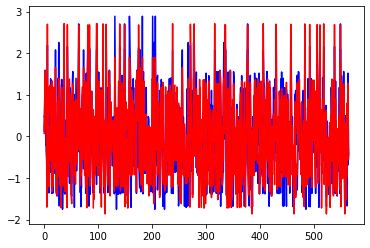

In [55]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=1.0, fit_intercept=True, 
                         normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
# defining parameter range 
param_grid = {'alpha': [0.1, 1, 10, 100, 1000],  
             'fit_intercept' : [True, False],
              'normalize' :[True, False],
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')


# 10 fold cross validation for best RR

In [56]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn import linear_model
best_rr = linear_model.Ridge(alpha=100, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=None, solver='sparse_cg', tol=0.001)
best_rr.fit(X_train, Y_train)
Y_pred = best_rr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)

r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))

print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE:Runtime \n', mape_scores_runtime)
print('\nMAPE:Power \n', mape_scores_power)


MSE: 
 22108.890804937066

R2: 
 0.8018819780814643

MAPE:Runtime 
 0.11272123974983643

MAPE:Power 
 0.1849720314345131


# 4. K-Nearest Neighbors + Grid Search

In [57]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5, weights='uniform', 
                            algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
# defining parameter range 
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 9, 10, 13, 15],  
             'weights' : ['uniform', 'distance'],
              'p' : [1, 2, 4, 5, 7 ,10]
             } 
grid = GridSearchCV(neigh, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=2, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=1, weights=uniform, score=0.843, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=2, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=1, weights=uniform, score=0.954, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=2, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=1, weights=uniform, score=0.462, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=1, weights=distance, score=0.864, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=1, weights=distance, score=0.956, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=1, weights=distance, score=0.465, total=   0.0s
[CV] n_neighbors=2, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=2, weights=uniform, score=0.829, total=   0.0s
[CV] n_neighbors=2, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=2, weights=uniform, score=0.946, total=   0.0s
[CV] n_neighbors=2, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=2, weights=uniform, score=0.556, total=   0.0s
[CV] n_neighbors=2, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=2, weights=distance, score=0.830, total=   0.0s
[CV] n_neighbors=2, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=2, weights=distance, score=0.948, total=   0.0s
[CV] n_neighbors=2, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=2, weights=distance, score=0.557, total=   0.0s
[CV] n_neighbors=2, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=4, weights=uniform, score=0.812, total=   0.1s
[CV] n_neighbors=2, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=4, weights=uniform, score=0.951, total=   0.1s
[CV] n_neighbors=2, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=4, weights=uniform, score=0.558, total=   0.1s
[CV] n_neighbors=2, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=4, weights=distance, score=0.812, total=   0.1s
[CV] n_neighbors=2, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=4, weights=distance, score=0.953, total=   0.1s
[CV] n_neighbors=2, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=4, weights=distance, score=0.559, total=   0.1s
[CV] n_neighbors=2, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=5, weights=uniform, score=0.812, total=   0.1s
[CV] n_neighbors=2, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=5, weights=uniform, score=0.951, total=   0.1s
[CV] n_neighbors=2, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=5, weights=uniform, score=0.556, total=   0.1s
[CV] n_neighbors=2, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=5, weights=distance, score=0.812, total=   0.1s
[CV] n_neighbors=2, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=5, weights=distance, score=0.953, total=   0.1s
[CV] n_neighbors=2, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=5, weights=distance, score=0.557, total=   0.1s
[CV] n_neighbors=2, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=7, weights=uniform, score=0.812, total=   0.1s
[CV] n_neighbors=2, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=7, weights=uniform, score=0.951, total=   0.1s
[CV] n_neighbors=2, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=2, p=7, weights=uniform, score=0.556, total=   0.1s
[CV] n_neighbors=2, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=7, weights=distance, score=0.812, total=   0.1s
[CV] n_neighbors=2, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=7, weights=distance, score=0.952, total=   0.1s
[CV] n_neighbors=2, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=7, weights=distance, score=0.556, total=   0.1s
[CV] n_neighbors=2, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=10, weights=uniform, score=0.812, total=   0.1s
[CV] n_neighbors=2, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=10, weights=uniform, score=0.951, total=   0.1s
[CV] n_neighbors=2, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=10, weights=uniform, score=0.554, total=   0.1s
[CV] n_neighbors=2, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=10, weights=distance, score=0.812, total=   0.1s
[CV] n_neighbors=2, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=10, weights=distance, score=0.952, total=   0.1s
[CV] n_neighbors=2, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=2, p=10, weights=distance, score=0.555, total=   0.1s
[CV] n_neighbors=3, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=1, weights=uniform, score=0.866, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=1, weights=uniform, score=0.932, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=1, weights=uniform, score=0.454, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=1, weights=distance, score=0.873, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=1, weights=distance, score=0.939, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=1, weights=distance, score=0.459, total=   0.0s
[CV] n_neighbors=3, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=2, weights=uniform, score=0.809, total=   0.0s
[CV] n_neighbors=3, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=2, weights=uniform, score=0.943, total=   0.0s
[CV] n_neighbors=3, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=2, weights=uniform, score=0.556, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=2, weights=distance, score=0.814, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=2, weights=distance, score=0.945, total=   0.0s
[CV] n_neighbors=3, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=2, weights=distance, score=0.557, total=   0.0s
[CV] n_neighbors=3, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=4, weights=uniform, score=0.806, total=   0.1s
[CV] n_neighbors=3, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=4, weights=uniform, score=0.936, total=   0.2s
[CV] n_neighbors=3, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=4, weights=uniform, score=0.557, total=   0.1s
[CV] n_neighbors=3, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=4, weights=distance, score=0.809, total=   0.1s
[CV] n_neighbors=3, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=4, weights=distance, score=0.937, total=   0.2s
[CV] n_neighbors=3, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=4, weights=distance, score=0.558, total=   0.1s
[CV] n_neighbors=3, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=5, weights=uniform, score=0.806, total=   0.1s
[CV] n_neighbors=3, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=5, weights=uniform, score=0.936, total=   0.2s
[CV] n_neighbors=3, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=5, weights=uniform, score=0.555, total=   0.1s
[CV] n_neighbors=3, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=5, weights=distance, score=0.809, total=   0.1s
[CV] n_neighbors=3, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=5, weights=distance, score=0.937, total=   0.2s
[CV] n_neighbors=3, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=5, weights=distance, score=0.556, total=   0.1s
[CV] n_neighbors=3, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=7, weights=uniform, score=0.805, total=   0.1s
[CV] n_neighbors=3, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=7, weights=uniform, score=0.936, total=   0.2s
[CV] n_neighbors=3, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=3, p=7, weights=uniform, score=0.555, total=   0.1s
[CV] n_neighbors=3, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=7, weights=distance, score=0.807, total=   0.1s
[CV] n_neighbors=3, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=7, weights=distance, score=0.937, total=   0.2s
[CV] n_neighbors=3, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=7, weights=distance, score=0.556, total=   0.1s
[CV] n_neighbors=3, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=10, weights=uniform, score=0.805, total=   0.1s
[CV] n_neighbors=3, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=10, weights=uniform, score=0.934, total=   0.2s
[CV] n_neighbors=3, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=10, weights=uniform, score=0.553, total=   0.1s
[CV] n_neighbors=3, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=10, weights=distance, score=0.807, total=   0.2s
[CV] n_neighbors=3, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=10, weights=distance, score=0.935, total=   0.2s
[CV] n_neighbors=3, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=3, p=10, weights=distance, score=0.554, total=   0.1s
[CV] n_neighbors=4, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] n_neighbors=4, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=1, weights=uniform, score=0.947, total=   0.0s
[CV] n_neighbors=4, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=1, weights=uniform, score=0.452, total=   0.0s
[CV] n_neighbors=4, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=1, weights=distance, score=0.871, total=   0.0s
[CV] n_neighbors=4, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=1, weights=distance, score=0.950, total=   0.0s
[CV] n_neighbors=4, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=1, weights=distance, score=0.457, total=   0.0s
[CV] n_neighbors=4, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=2, weights=uniform, score=0.809, total=   0.0s
[CV] n_neighbors=4, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=2, weights=uniform, score=0.944, total=   0.0s
[CV] n_neighbors=4, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=2, weights=uniform, score=0.559, total=   0.1s
[CV] n_neighbors=4, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=2, weights=distance, score=0.812, total=   0.0s
[CV] n_neighbors=4, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=2, weights=distance, score=0.946, total=   0.0s
[CV] n_neighbors=4, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=2, weights=distance, score=0.560, total=   0.0s
[CV] n_neighbors=4, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=4, weights=uniform, score=0.806, total=   0.1s
[CV] n_neighbors=4, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=4, weights=uniform, score=0.936, total=   0.2s
[CV] n_neighbors=4, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=4, weights=uniform, score=0.559, total=   0.1s
[CV] n_neighbors=4, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=4, weights=distance, score=0.809, total=   0.1s
[CV] n_neighbors=4, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=4, weights=distance, score=0.938, total=   0.2s
[CV] n_neighbors=4, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=4, weights=distance, score=0.559, total=   0.1s
[CV] n_neighbors=4, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=5, weights=uniform, score=0.807, total=   0.1s
[CV] n_neighbors=4, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=5, weights=uniform, score=0.936, total=   0.2s
[CV] n_neighbors=4, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=5, weights=uniform, score=0.558, total=   0.1s
[CV] n_neighbors=4, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=5, weights=distance, score=0.809, total=   0.1s
[CV] n_neighbors=4, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=5, weights=distance, score=0.938, total=   0.2s
[CV] n_neighbors=4, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=5, weights=distance, score=0.559, total=   0.1s
[CV] n_neighbors=4, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=7, weights=uniform, score=0.806, total=   0.1s
[CV] n_neighbors=4, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=7, weights=uniform, score=0.935, total=   0.1s
[CV] n_neighbors=4, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=4, p=7, weights=uniform, score=0.558, total=   0.1s
[CV] n_neighbors=4, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=7, weights=distance, score=0.808, total=   0.1s
[CV] n_neighbors=4, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=7, weights=distance, score=0.936, total=   0.1s
[CV] n_neighbors=4, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=7, weights=distance, score=0.559, total=   0.1s
[CV] n_neighbors=4, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=10, weights=uniform, score=0.806, total=   0.1s
[CV] n_neighbors=4, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=10, weights=uniform, score=0.935, total=   0.2s
[CV] n_neighbors=4, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=10, weights=uniform, score=0.554, total=   0.1s
[CV] n_neighbors=4, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=10, weights=distance, score=0.808, total=   0.1s
[CV] n_neighbors=4, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=10, weights=distance, score=0.936, total=   0.2s
[CV] n_neighbors=4, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=4, p=10, weights=distance, score=0.554, total=   0.1s
[CV] n_neighbors=5, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=1, weights=uniform, score=0.884, total=   0.0s
[CV] n_neighbors=5, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] n_neighbors=5, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=1, weights=uniform, score=0.454, total=   0.0s
[CV] n_neighbors=5, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=1, weights=distance, score=0.886, total=   0.0s
[CV] n_neighbors=5, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=1, weights=distance, score=0.953, total=   0.0s
[CV] n_neighbors=5, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=1, weights=distance, score=0.458, total=   0.0s
[CV] n_neighbors=5, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=2, weights=uniform, score=0.814, total=   0.0s
[CV] n_neighbors=5, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=2, weights=uniform, score=0.942, total=   0.0s
[CV] n_neighbors=5, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=2, weights=uniform, score=0.560, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=2, weights=distance, score=0.818, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=2, weights=distance, score=0.944, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=2, weights=distance, score=0.561, total=   0.0s
[CV] n_neighbors=5, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=4, weights=uniform, score=0.812, total=   0.1s
[CV] n_neighbors=5, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=4, weights=uniform, score=0.934, total=   0.2s
[CV] n_neighbors=5, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=4, weights=uniform, score=0.559, total=   0.1s
[CV] n_neighbors=5, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=4, weights=distance, score=0.815, total=   0.1s
[CV] n_neighbors=5, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=4, weights=distance, score=0.936, total=   0.2s
[CV] n_neighbors=5, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=4, weights=distance, score=0.560, total=   0.1s
[CV] n_neighbors=5, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=5, weights=uniform, score=0.809, total=   0.1s
[CV] n_neighbors=5, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=5, weights=uniform, score=0.934, total=   0.1s
[CV] n_neighbors=5, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=5, weights=uniform, score=0.558, total=   0.1s
[CV] n_neighbors=5, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=5, weights=distance, score=0.812, total=   0.1s
[CV] n_neighbors=5, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=5, weights=distance, score=0.936, total=   0.2s
[CV] n_neighbors=5, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=5, weights=distance, score=0.558, total=   0.1s
[CV] n_neighbors=5, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=7, weights=uniform, score=0.804, total=   0.1s
[CV] n_neighbors=5, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=7, weights=uniform, score=0.934, total=   0.2s
[CV] n_neighbors=5, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=5, p=7, weights=uniform, score=0.557, total=   0.1s
[CV] n_neighbors=5, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=7, weights=distance, score=0.808, total=   0.1s
[CV] n_neighbors=5, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=7, weights=distance, score=0.936, total=   0.2s
[CV] n_neighbors=5, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=7, weights=distance, score=0.558, total=   0.1s
[CV] n_neighbors=5, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=10, weights=uniform, score=0.804, total=   0.1s
[CV] n_neighbors=5, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=10, weights=uniform, score=0.932, total=   0.3s
[CV] n_neighbors=5, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=10, weights=uniform, score=0.555, total=   0.1s
[CV] n_neighbors=5, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=10, weights=distance, score=0.807, total=   0.1s
[CV] n_neighbors=5, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=10, weights=distance, score=0.933, total=   0.2s
[CV] n_neighbors=5, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=5, p=10, weights=distance, score=0.555, total=   0.1s
[CV] n_neighbors=6, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=1, weights=uniform, score=0.900, total=   0.0s
[CV] n_neighbors=6, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=1, weights=uniform, score=0.945, total=   0.0s
[CV] n_neighbors=6, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=1, weights=uniform, score=0.463, total=   0.0s
[CV] n_neighbors=6, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=1, weights=distance, score=0.904, total=   0.0s
[CV] n_neighbors=6, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=1, weights=distance, score=0.949, total=   0.0s
[CV] n_neighbors=6, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=1, weights=distance, score=0.465, total=   0.0s
[CV] n_neighbors=6, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=2, weights=uniform, score=0.831, total=   0.0s
[CV] n_neighbors=6, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=2, weights=uniform, score=0.941, total=   0.0s
[CV] n_neighbors=6, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=2, weights=uniform, score=0.561, total=   0.0s
[CV] n_neighbors=6, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=2, weights=distance, score=0.834, total=   0.0s
[CV] n_neighbors=6, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=2, weights=distance, score=0.944, total=   0.0s
[CV] n_neighbors=6, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=2, weights=distance, score=0.562, total=   0.0s
[CV] n_neighbors=6, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=4, weights=uniform, score=0.813, total=   0.1s
[CV] n_neighbors=6, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=4, weights=uniform, score=0.936, total=   0.2s
[CV] n_neighbors=6, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=4, weights=uniform, score=0.561, total=   0.1s
[CV] n_neighbors=6, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=4, weights=distance, score=0.816, total=   0.1s
[CV] n_neighbors=6, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=4, weights=distance, score=0.939, total=   0.2s
[CV] n_neighbors=6, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=4, weights=distance, score=0.561, total=   0.1s
[CV] n_neighbors=6, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=5, weights=uniform, score=0.809, total=   0.1s
[CV] n_neighbors=6, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=5, weights=uniform, score=0.936, total=   0.2s
[CV] n_neighbors=6, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=5, weights=uniform, score=0.559, total=   0.1s
[CV] n_neighbors=6, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=5, weights=distance, score=0.813, total=   0.1s
[CV] n_neighbors=6, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=5, weights=distance, score=0.938, total=   0.2s
[CV] n_neighbors=6, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=5, weights=distance, score=0.560, total=   0.1s
[CV] n_neighbors=6, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=7, weights=uniform, score=0.802, total=   0.1s
[CV] n_neighbors=6, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=7, weights=uniform, score=0.936, total=   0.2s
[CV] n_neighbors=6, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=6, p=7, weights=uniform, score=0.557, total=   0.1s
[CV] n_neighbors=6, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=7, weights=distance, score=0.807, total=   0.1s
[CV] n_neighbors=6, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=7, weights=distance, score=0.938, total=   0.2s
[CV] n_neighbors=6, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=7, weights=distance, score=0.558, total=   0.1s
[CV] n_neighbors=6, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=10, weights=uniform, score=0.802, total=   0.1s
[CV] n_neighbors=6, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=10, weights=uniform, score=0.934, total=   0.2s
[CV] n_neighbors=6, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=10, weights=uniform, score=0.556, total=   0.1s
[CV] n_neighbors=6, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=10, weights=distance, score=0.807, total=   0.1s
[CV] n_neighbors=6, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=10, weights=distance, score=0.936, total=   0.2s
[CV] n_neighbors=6, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=6, p=10, weights=distance, score=0.556, total=   0.1s
[CV] n_neighbors=7, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=1, weights=uniform, score=0.900, total=   0.0s
[CV] n_neighbors=7, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=1, weights=uniform, score=0.942, total=   0.0s
[CV] n_neighbors=7, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=1, weights=uniform, score=0.476, total=   0.0s
[CV] n_neighbors=7, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=1, weights=distance, score=0.907, total=   0.0s
[CV] n_neighbors=7, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=1, weights=distance, score=0.947, total=   0.0s
[CV] n_neighbors=7, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=1, weights=distance, score=0.477, total=   0.0s
[CV] n_neighbors=7, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=2, weights=uniform, score=0.836, total=   0.1s
[CV] n_neighbors=7, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=2, weights=uniform, score=0.938, total=   0.1s
[CV] n_neighbors=7, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=2, weights=uniform, score=0.564, total=   0.0s
[CV] n_neighbors=7, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=2, weights=distance, score=0.840, total=   0.0s
[CV] n_neighbors=7, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=2, weights=distance, score=0.942, total=   0.0s
[CV] n_neighbors=7, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=2, weights=distance, score=0.564, total=   0.0s
[CV] n_neighbors=7, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=4, weights=uniform, score=0.820, total=   0.1s
[CV] n_neighbors=7, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=4, weights=uniform, score=0.937, total=   0.2s
[CV] n_neighbors=7, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=4, weights=uniform, score=0.561, total=   0.1s
[CV] n_neighbors=7, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=4, weights=distance, score=0.825, total=   0.1s
[CV] n_neighbors=7, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=4, weights=distance, score=0.939, total=   0.2s
[CV] n_neighbors=7, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=4, weights=distance, score=0.561, total=   0.1s
[CV] n_neighbors=7, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=5, weights=uniform, score=0.810, total=   0.2s
[CV] n_neighbors=7, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=5, weights=uniform, score=0.935, total=   0.2s
[CV] n_neighbors=7, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=5, weights=uniform, score=0.558, total=   0.1s
[CV] n_neighbors=7, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=5, weights=distance, score=0.816, total=   0.2s
[CV] n_neighbors=7, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=5, weights=distance, score=0.938, total=   0.2s
[CV] n_neighbors=7, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=5, weights=distance, score=0.559, total=   0.1s
[CV] n_neighbors=7, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=7, weights=uniform, score=0.794, total=   0.1s
[CV] n_neighbors=7, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=7, weights=uniform, score=0.935, total=   0.2s
[CV] n_neighbors=7, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=7, p=7, weights=uniform, score=0.556, total=   0.1s
[CV] n_neighbors=7, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=7, weights=distance, score=0.802, total=   0.1s
[CV] n_neighbors=7, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=7, weights=distance, score=0.938, total=   0.2s
[CV] n_neighbors=7, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=7, weights=distance, score=0.556, total=   0.1s
[CV] n_neighbors=7, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=10, weights=uniform, score=0.794, total=   0.1s
[CV] n_neighbors=7, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=10, weights=uniform, score=0.932, total=   0.2s
[CV] n_neighbors=7, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=10, weights=uniform, score=0.555, total=   0.1s
[CV] n_neighbors=7, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=10, weights=distance, score=0.802, total=   0.1s
[CV] n_neighbors=7, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=10, weights=distance, score=0.934, total=   0.2s
[CV] n_neighbors=7, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=7, p=10, weights=distance, score=0.556, total=   0.1s
[CV] n_neighbors=9, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=1, weights=uniform, score=0.889, total=   0.0s
[CV] n_neighbors=9, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=1, weights=uniform, score=0.937, total=   0.0s
[CV] n_neighbors=9, p=1, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=1, weights=uniform, score=0.477, total=   0.0s
[CV] n_neighbors=9, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=1, weights=distance, score=0.901, total=   0.0s
[CV] n_neighbors=9, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=1, weights=distance, score=0.943, total=   0.0s
[CV] n_neighbors=9, p=1, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=1, weights=distance, score=0.480, total=   0.0s
[CV] n_neighbors=9, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=2, weights=uniform, score=0.854, total=   0.0s
[CV] n_neighbors=9, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=2, weights=uniform, score=0.931, total=   0.0s
[CV] n_neighbors=9, p=2, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=2, weights=uniform, score=0.561, total=   0.0s
[CV] n_neighbors=9, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=2, weights=distance, score=0.861, total=   0.0s
[CV] n_neighbors=9, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=2, weights=distance, score=0.936, total=   0.0s
[CV] n_neighbors=9, p=2, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=2, weights=distance, score=0.562, total=   0.0s
[CV] n_neighbors=9, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=4, weights=uniform, score=0.816, total=   0.1s
[CV] n_neighbors=9, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=4, weights=uniform, score=0.932, total=   0.2s
[CV] n_neighbors=9, p=4, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=4, weights=uniform, score=0.558, total=   0.1s
[CV] n_neighbors=9, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=4, weights=distance, score=0.826, total=   0.1s
[CV] n_neighbors=9, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=4, weights=distance, score=0.935, total=   0.2s
[CV] n_neighbors=9, p=4, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=4, weights=distance, score=0.559, total=   0.1s
[CV] n_neighbors=9, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=5, weights=uniform, score=0.807, total=   0.1s
[CV] n_neighbors=9, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=5, weights=uniform, score=0.930, total=   0.2s
[CV] n_neighbors=9, p=5, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=5, weights=uniform, score=0.553, total=   0.1s
[CV] n_neighbors=9, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=5, weights=distance, score=0.817, total=   0.1s
[CV] n_neighbors=9, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=5, weights=distance, score=0.934, total=   0.2s
[CV] n_neighbors=9, p=5, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=5, weights=distance, score=0.554, total=   0.1s
[CV] n_neighbors=9, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=7, weights=uniform, score=0.784, total=   0.2s
[CV] n_neighbors=9, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=7, weights=uniform, score=0.931, total=   0.2s
[CV] n_neighbors=9, p=7, weights=uniform .............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] . n_neighbors=9, p=7, weights=uniform, score=0.551, total=   0.1s
[CV] n_neighbors=9, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=7, weights=distance, score=0.798, total=   0.1s
[CV] n_neighbors=9, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=7, weights=distance, score=0.934, total=   0.2s
[CV] n_neighbors=9, p=7, weights=distance ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=7, weights=distance, score=0.552, total=   0.1s
[CV] n_neighbors=9, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=10, weights=uniform, score=0.784, total=   0.1s
[CV] n_neighbors=9, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=10, weights=uniform, score=0.927, total=   0.2s
[CV] n_neighbors=9, p=10, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=10, weights=uniform, score=0.554, total=   0.1s
[CV] n_neighbors=9, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=10, weights=distance, score=0.798, total=   0.1s
[CV] n_neighbors=9, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=10, weights=distance, score=0.930, total=   0.2s
[CV] n_neighbors=9, p=10, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=9, p=10, weights=distance, score=0.554, total=   0.1s
[CV] n_neighbors=10, p=1, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=1, weights=uniform, score=0.879, total=   0.0s
[CV] n_neighbors=10, p=1, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=1, weights=uniform, score=0.934, total=   0.0s
[CV] n_neighbors=10, p=1, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=1, weights=uniform, score=0.473, total=   0.0s
[CV] n_neighbors=10, p=1, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=1, weights=distance, score=0.895, total=   0.0s
[CV] n_neighbors=10, p=1, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=1, weights=distance, score=0.940, total=   0.0s
[CV] n_neighbors=10, p=1, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=1, weights=distance, score=0.476, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=2, weights=uniform, score=0.855, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=2, weights=uniform, score=0.930, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=2, weights=uniform, score=0.559, total=   0.0s
[CV] n_neighbors=10, p=2, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=2, weights=distance, score=0.864, total=   0.0s
[CV] n_neighbors=10, p=2, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=2, weights=distance, score=0.936, total=   0.0s
[CV] n_neighbors=10, p=2, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=2, weights=distance, score=0.561, total=   0.0s
[CV] n_neighbors=10, p=4, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=4, weights=uniform, score=0.817, total=   0.2s
[CV] n_neighbors=10, p=4, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=4, weights=uniform, score=0.932, total=   0.2s
[CV] n_neighbors=10, p=4, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=4, weights=uniform, score=0.556, total=   0.1s
[CV] n_neighbors=10, p=4, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=4, weights=distance, score=0.828, total=   0.1s
[CV] n_neighbors=10, p=4, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=4, weights=distance, score=0.936, total=   0.2s
[CV] n_neighbors=10, p=4, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=4, weights=distance, score=0.557, total=   0.1s
[CV] n_neighbors=10, p=5, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=5, weights=uniform, score=0.810, total=   0.1s
[CV] n_neighbors=10, p=5, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=5, weights=uniform, score=0.931, total=   0.2s
[CV] n_neighbors=10, p=5, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=5, weights=uniform, score=0.552, total=   0.1s
[CV] n_neighbors=10, p=5, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=5, weights=distance, score=0.821, total=   0.2s
[CV] n_neighbors=10, p=5, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=5, weights=distance, score=0.934, total=   0.2s
[CV] n_neighbors=10, p=5, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=5, weights=distance, score=0.553, total=   0.1s
[CV] n_neighbors=10, p=7, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=7, weights=uniform, score=0.784, total=   0.1s
[CV] n_neighbors=10, p=7, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=7, weights=uniform, score=0.931, total=   0.2s
[CV] n_neighbors=10, p=7, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=7, weights=uniform, score=0.549, total=   0.1s
[CV] n_neighbors=10, p=7, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=7, weights=distance, score=0.800, total=   0.1s
[CV] n_neighbors=10, p=7, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=7, weights=distance, score=0.935, total=   0.2s
[CV] n_neighbors=10, p=7, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=7, weights=distance, score=0.550, total=   0.2s
[CV] n_neighbors=10, p=10, weights=uniform ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=10, weights=uniform, score=0.784, total=   0.2s
[CV] n_neighbors=10, p=10, weights=uniform ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=10, weights=uniform, score=0.928, total=   0.2s
[CV] n_neighbors=10, p=10, weights=uniform ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=10, weights=uniform, score=0.556, total=   0.1s
[CV] n_neighbors=10, p=10, weights=distance ..........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=10, weights=distance, score=0.799, total=   0.2s
[CV] n_neighbors=10, p=10, weights=distance ..........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=10, weights=distance, score=0.931, total=   0.2s
[CV] n_neighbors=10, p=10, weights=distance ..........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=10, p=10, weights=distance, score=0.556, total=   0.1s
[CV] n_neighbors=13, p=1, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=1, weights=uniform, score=0.877, total=   0.0s
[CV] n_neighbors=13, p=1, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=1, weights=uniform, score=0.924, total=   0.0s
[CV] n_neighbors=13, p=1, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=1, weights=uniform, score=0.466, total=   0.0s
[CV] n_neighbors=13, p=1, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=1, weights=distance, score=0.895, total=   0.0s
[CV] n_neighbors=13, p=1, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] n_neighbors=13, p=1, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=1, weights=distance, score=0.470, total=   0.0s
[CV] n_neighbors=13, p=2, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=2, weights=uniform, score=0.858, total=   0.0s
[CV] n_neighbors=13, p=2, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=2, weights=uniform, score=0.924, total=   0.0s
[CV] n_neighbors=13, p=2, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=2, weights=uniform, score=0.557, total=   0.0s
[CV] n_neighbors=13, p=2, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=2, weights=distance, score=0.871, total=   0.0s
[CV] n_neighbors=13, p=2, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=2, weights=distance, score=0.932, total=   0.0s
[CV] n_neighbors=13, p=2, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=2, weights=distance, score=0.559, total=   0.0s
[CV] n_neighbors=13, p=4, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=4, weights=uniform, score=0.810, total=   0.2s
[CV] n_neighbors=13, p=4, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=4, weights=uniform, score=0.924, total=   0.2s
[CV] n_neighbors=13, p=4, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=4, weights=uniform, score=0.549, total=   0.1s
[CV] n_neighbors=13, p=4, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=4, weights=distance, score=0.826, total=   0.2s
[CV] n_neighbors=13, p=4, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=4, weights=distance, score=0.930, total=   0.2s
[CV] n_neighbors=13, p=4, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=4, weights=distance, score=0.551, total=   0.1s
[CV] n_neighbors=13, p=5, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=5, weights=uniform, score=0.806, total=   0.2s
[CV] n_neighbors=13, p=5, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=5, weights=uniform, score=0.921, total=   0.2s
[CV] n_neighbors=13, p=5, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=5, weights=uniform, score=0.548, total=   0.1s
[CV] n_neighbors=13, p=5, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=5, weights=distance, score=0.821, total=   0.2s
[CV] n_neighbors=13, p=5, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=5, weights=distance, score=0.927, total=   0.2s
[CV] n_neighbors=13, p=5, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=5, weights=distance, score=0.549, total=   0.1s
[CV] n_neighbors=13, p=7, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=7, weights=uniform, score=0.785, total=   0.2s
[CV] n_neighbors=13, p=7, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=7, weights=uniform, score=0.923, total=   0.2s
[CV] n_neighbors=13, p=7, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=7, weights=uniform, score=0.546, total=   0.1s
[CV] n_neighbors=13, p=7, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=7, weights=distance, score=0.805, total=   0.2s
[CV] n_neighbors=13, p=7, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=7, weights=distance, score=0.929, total=   0.2s
[CV] n_neighbors=13, p=7, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=7, weights=distance, score=0.547, total=   0.1s
[CV] n_neighbors=13, p=10, weights=uniform ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=10, weights=uniform, score=0.784, total=   0.2s
[CV] n_neighbors=13, p=10, weights=uniform ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=10, weights=uniform, score=0.922, total=   0.2s
[CV] n_neighbors=13, p=10, weights=uniform ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=10, weights=uniform, score=0.563, total=   0.1s
[CV] n_neighbors=13, p=10, weights=distance ..........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=10, weights=distance, score=0.803, total=   0.2s
[CV] n_neighbors=13, p=10, weights=distance ..........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=10, weights=distance, score=0.927, total=   0.2s
[CV] n_neighbors=13, p=10, weights=distance ..........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=13, p=10, weights=distance, score=0.563, total=   0.1s
[CV] n_neighbors=15, p=1, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=1, weights=uniform, score=0.876, total=   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=1, weights=uniform, score=0.919, total=   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=1, weights=uniform, score=0.462, total=   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=1, weights=distance, score=0.897, total=   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=1, weights=distance, score=0.929, total=   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=1, weights=distance, score=0.466, total=   0.0s
[CV] n_neighbors=15, p=2, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=2, weights=uniform, score=0.864, total=   0.0s
[CV] n_neighbors=15, p=2, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=2, weights=uniform, score=0.921, total=   0.0s
[CV] n_neighbors=15, p=2, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=2, weights=uniform, score=0.554, total=   0.0s
[CV] n_neighbors=15, p=2, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=2, weights=distance, score=0.880, total=   0.0s
[CV] n_neighbors=15, p=2, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=2, weights=distance, score=0.930, total=   0.0s
[CV] n_neighbors=15, p=2, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=2, weights=distance, score=0.556, total=   0.0s
[CV] n_neighbors=15, p=4, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=4, weights=uniform, score=0.809, total=   0.2s
[CV] n_neighbors=15, p=4, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=4, weights=uniform, score=0.916, total=   0.2s
[CV] n_neighbors=15, p=4, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=4, weights=uniform, score=0.547, total=   0.1s
[CV] n_neighbors=15, p=4, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=4, weights=distance, score=0.826, total=   0.2s
[CV] n_neighbors=15, p=4, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=4, weights=distance, score=0.925, total=   0.2s
[CV] n_neighbors=15, p=4, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=4, weights=distance, score=0.549, total=   0.1s
[CV] n_neighbors=15, p=5, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=5, weights=uniform, score=0.803, total=   0.2s
[CV] n_neighbors=15, p=5, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=5, weights=uniform, score=0.913, total=   0.2s
[CV] n_neighbors=15, p=5, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=5, weights=uniform, score=0.546, total=   0.1s
[CV] n_neighbors=15, p=5, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=5, weights=distance, score=0.821, total=   0.2s
[CV] n_neighbors=15, p=5, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=5, weights=distance, score=0.922, total=   0.2s
[CV] n_neighbors=15, p=5, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=5, weights=distance, score=0.548, total=   0.1s
[CV] n_neighbors=15, p=7, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=7, weights=uniform, score=0.785, total=   0.2s
[CV] n_neighbors=15, p=7, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=7, weights=uniform, score=0.915, total=   0.2s
[CV] n_neighbors=15, p=7, weights=uniform ............................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=7, weights=uniform, score=0.544, total=   0.1s
[CV] n_neighbors=15, p=7, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=7, weights=distance, score=0.808, total=   0.2s
[CV] n_neighbors=15, p=7, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=7, weights=distance, score=0.924, total=   0.4s
[CV] n_neighbors=15, p=7, weights=distance ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=7, weights=distance, score=0.545, total=   0.2s
[CV] n_neighbors=15, p=10, weights=uniform ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=10, weights=uniform, score=0.783, total=   0.2s
[CV] n_neighbors=15, p=10, weights=uniform ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=10, weights=uniform, score=0.917, total=   0.2s
[CV] n_neighbors=15, p=10, weights=uniform ...........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=10, weights=uniform, score=0.568, total=   0.1s
[CV] n_neighbors=15, p=10, weights=distance ..........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=10, weights=distance, score=0.805, total=   0.2s
[CV] n_neighbors=15, p=10, weights=distance ..........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=10, weights=distance, score=0.924, total=   0.2s
[CV] n_neighbors=15, p=10, weights=distance ..........................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  n_neighbors=15, p=10, weights=distance, score=0.567, total=   0.1s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   40.2s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
MSE =  0.3032558646169814


# 10 fold cross validation for best KNN Regressor

In [58]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.neighbors import KNeighborsRegressor
best_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
best_knn.fit(X_train, Y_train)
Y_pred = best_knn.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)

r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))

print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE:Runtime \n', mape_scores_runtime)
print('\nMAPE:Power \n', mape_scores_power)


MSE: 
 41149.73236706397

R2: 
 0.696744135383019

MAPE:Runtime 
 0.1422172450424624

MAPE:Power 
 0.22107336039768882


# 5. Gaussian Process Regressor (Marcov Chain Monte Carlo) + Grid Search

In [59]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0 , 
                               normalize_y= True, copy_X_train=True, random_state= None)
# defining parameter range 
param_grid = {'alpha': [1e-10, 1e-9, 1e-5, 1e-2],  
             'normalize_y' : [True, False],
                         } 
grid = GridSearchCV(gpr, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-10, normalize_y=True ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=1e-10, normalize_y=True, score=0.823, total=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=1e-10, normalize_y=True, score=0.551, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=1e-10, normalize_y=True, score=0.479, total=   0.2s
[CV] alpha=1e-10, normalize_y=False ..................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ...... alpha=1e-10, normalize_y=False, score=0.858, total=   0.2s
[CV] alpha=1e-10, normalize_y=False ..................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ...... alpha=1e-10, normalize_y=False, score=0.609, total=   0.2s
[CV] alpha=1e-10, normalize_y=False ..................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ...... alpha=1e-10, normalize_y=False, score=0.484, total=   0.2s
[CV] alpha=1e-09, normalize_y=True ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=1e-09, normalize_y=True, score=0.823, total=   0.2s
[CV] alpha=1e-09, normalize_y=True ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=1e-09, normalize_y=True, score=0.551, total=   0.2s
[CV] alpha=1e-09, normalize_y=True ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=1e-09, normalize_y=True, score=0.479, total=   0.2s
[CV] alpha=1e-09, normalize_y=False ..................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ...... alpha=1e-09, normalize_y=False, score=0.858, total=   0.2s
[CV] alpha=1e-09, normalize_y=False ..................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ...... alpha=1e-09, normalize_y=False, score=0.609, total=   0.2s
[CV] alpha=1e-09, normalize_y=False ..................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ...... alpha=1e-09, normalize_y=False, score=0.484, total=   0.4s
[CV] alpha=1e-05, normalize_y=True ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=1e-05, normalize_y=True, score=0.823, total=   0.3s
[CV] alpha=1e-05, normalize_y=True ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=1e-05, normalize_y=True, score=0.551, total=   0.3s
[CV] alpha=1e-05, normalize_y=True ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=1e-05, normalize_y=True, score=0.480, total=   0.3s
[CV] alpha=1e-05, normalize_y=False ..................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ...... alpha=1e-05, normalize_y=False, score=0.858, total=   0.2s
[CV] alpha=1e-05, normalize_y=False ..................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ...... alpha=1e-05, normalize_y=False, score=0.609, total=   0.3s
[CV] alpha=1e-05, normalize_y=False ..................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ...... alpha=1e-05, normalize_y=False, score=0.485, total=   0.3s
[CV] alpha=0.01, normalize_y=True ....................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ........ alpha=0.01, normalize_y=True, score=0.822, total=   0.3s
[CV] alpha=0.01, normalize_y=True ....................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ........ alpha=0.01, normalize_y=True, score=0.547, total=   0.2s
[CV] alpha=0.01, normalize_y=True ....................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ........ alpha=0.01, normalize_y=True, score=0.455, total=   0.2s
[CV] alpha=0.01, normalize_y=False ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=0.01, normalize_y=False, score=0.857, total=   0.2s
[CV] alpha=0.01, normalize_y=False ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=0.01, normalize_y=False, score=0.606, total=   0.2s
[CV] alpha=0.01, normalize_y=False ...................................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV] ....... alpha=0.01, normalize_y=False, score=0.460, total=   0.2s


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    6.0s finished


{'alpha': 1e-05, 'normalize_y': False}
GaussianProcessRegressor(alpha=1e-05, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)


# 10 fold cross validation for best Gaussian Process Regressor

In [60]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.gaussian_process import GaussianProcessRegressor
best_gpr = GaussianProcessRegressor(alpha=1e-05, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
best_gpr.fit(X_train, Y_train)
Y_pred = best_gpr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)

r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))

print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE:Runtime \n', mape_scores_runtime)
print('\nMAPE:Power \n', mape_scores_power)


MSE: 
 351693.47553503374

R2: 
 0.12114667261134299

MAPE:Runtime 
 0.6979704783839025

MAPE:Power 
 0.29010537481551457


# 6. Decision Tree + Grid Search

In [61]:
from sklearn.tree import DecisionTreeRegressor #  ' min_samples_split' : [2],
regressor = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, 
                                  min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, min_impurity_split=None)
# defining parameter range 
param_grid = {'criterion': ['mse','friedman_mse', 'mae'],  
              'splitter' : ['best', 'random'], 
              'max_depth': [2,3,4,5,7,9,10,15,20,30 ],
              'min_samples_leaf' : [1, 2,3,  4, 5,6, 7],
              'max_features' : ['auto', 'sqrt', 'log2'],
             } 
grid = GridSearchCV(regressor, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=-0.109, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=0.700, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=0.513, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.693, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=0.296, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=0.405, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best, score=0.700, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best, score=0.513, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random, score=-0.180, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random, score=0.324, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random, score=0.171, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best, score=0.700, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best, score=0.513, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.322, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.126, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=0.261, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best, score=0.700, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best, score=0.513, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.911, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random, score=0.055, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random, score=0.193, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best, score=0.700, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best, score=0.513, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random, score=0.249, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random, score=0.433, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random, score=0.335, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best, score=0.700, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best, score=0.513, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random, score=0.364, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random, score=0.332, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random, score=0.261, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best, score=0.700, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best, score=0.513, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random, score=0.187, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random, score=0.218, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random, score=0.234, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-0.040, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.056, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.513, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.100, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.116, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.066, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-1.140, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.418, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.040, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.522, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.265, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.100, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-0.032, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.056, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.159, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.564, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.262, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.097, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.009, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.495, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.066, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.906, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.352, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.071, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.611, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.240, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.292, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.040, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.054, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.215, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.265, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.160, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.027, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.024, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.168, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.097, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.847, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.054, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.076, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.082, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.035, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.254, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.392, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.621, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=0.167, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.129, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random, score=0.160, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random, score=0.363, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best, score=-0.847, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best, score=0.054, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best, score=0.166, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.036, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random, score=0.319, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random, score=0.110, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.016, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.422, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best, score=0.252, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random, score=0.030, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random, score=0.182, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random, score=0.431, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.265, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best, score=0.054, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best, score=0.270, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random, score=0.087, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random, score=0.229, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random, score=0.270, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.033, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.086, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best, score=0.455, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.448, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random, score=0.122, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random, score=0.039, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.651, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.263, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best, score=0.066, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.254, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.283, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random, score=0.189, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best, score=0.003, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best, score=0.210, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best, score=0.307, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.442, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.145, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random, score=0.121, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best, score=0.080, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best, score=0.613, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best, score=0.562, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.254, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random, score=0.472, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random, score=0.374, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best, score=0.080, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best, score=0.613, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best, score=0.562, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random, score=0.023, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random, score=0.402, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random, score=0.496, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best, score=0.080, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best, score=0.613, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best, score=0.562, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.135, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random, score=0.366, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random, score=0.420, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=0.080, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=0.613, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=0.562, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=0.563, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=0.549, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=0.551, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best, score=0.080, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best, score=0.613, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best, score=0.562, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random, score=0.125, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random, score=0.367, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random, score=0.383, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best, score=0.080, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best, score=0.613, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best, score=0.562, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=-0.328, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=0.423, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=0.484, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.080, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.613, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.562, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.464, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.382, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.270, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-1.201, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.606, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.199, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.307, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.460, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.231, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.243, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.070, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.284, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.102, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.327, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.042, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.396, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.411, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.166, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.438, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.001, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.101, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.333, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.323, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.219, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-2.354, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.444, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.323, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.553, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.147, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.352, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-1.117, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.052, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.158, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.422, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.168, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.198, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.306, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.245, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.376, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.270, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.342, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.264, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.464, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.028, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.268, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best, score=0.561, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.422, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best, score=0.362, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.254, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.056, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random, score=0.215, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=-0.032, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=0.295, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=0.094, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.111, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.278, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.308, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.408, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=0.436, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=0.423, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.570, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random, score=0.083, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random, score=0.321, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.207, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best, score=0.590, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best, score=0.433, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random, score=0.274, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random, score=0.065, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random, score=0.271, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.454, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.548, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best, score=0.180, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.206, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.087, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=0.357, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=0.227, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=0.570, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=0.293, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.357, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=0.304, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=0.307, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score=0.500, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score=0.342, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score=0.265, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.032, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random, score=0.054, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random, score=0.268, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best, score=0.168, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best, score=0.745, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.656, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random, score=0.586, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random, score=0.473, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best, score=0.168, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best, score=0.579, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random, score=-0.004, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random, score=0.586, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random, score=0.532, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best, score=0.168, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best, score=0.745, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=0.364, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=0.273, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=0.511, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=0.168, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=0.579, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.634, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, score=0.428, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, score=0.511, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best, score=0.168, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best, score=0.745, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random, score=0.296, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random, score=0.625, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random, score=0.580, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best, score=0.168, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best, score=0.745, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random, score=0.428, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random, score=0.519, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random, score=0.480, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.168, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.579, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.003, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.298, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.486, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.600, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.357, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.306, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.230, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.476, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.425, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.224, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.633, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.314, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.054, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.139, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.249, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.490, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-0.016, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.259, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.385, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.111, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.152, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.455, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.460, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.442, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.564, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.180, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.401, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.611, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.457, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.434, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.461, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.222, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.266, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.377, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.369, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.090, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.232, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.377, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.313, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.404, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.304, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.366, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.142, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.311, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.254, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best, score=0.394, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best, score=0.505, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best, score=0.327, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random, score=0.305, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random, score=0.456, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random, score=0.326, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best, score=0.527, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best, score=0.359, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best, score=0.300, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.607, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random, score=0.108, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random, score=0.256, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=0.506, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=0.771, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=0.434, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=0.370, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.460, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=0.141, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best, score=0.080, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best, score=0.502, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best, score=0.416, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random, score=0.130, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random, score=0.069, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random, score=0.345, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=0.672, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.485, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=0.317, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.189, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.069, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.509, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=0.018, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=0.488, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=0.363, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random, score=0.026, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random, score=0.201, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random, score=0.201, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best, score=0.585, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best, score=0.318, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best, score=0.374, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.634, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random, score=0.514, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random, score=0.353, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best, score=0.605, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best, score=0.512, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best, score=0.657, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.124, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random, score=0.511, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random, score=0.546, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best, score=0.605, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best, score=0.678, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best, score=0.657, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random, score=0.081, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random, score=0.560, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random, score=0.454, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best, score=0.605, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best, score=0.678, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best, score=0.657, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random, score=0.253, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random, score=0.514, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random, score=0.477, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=0.605, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=0.844, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=0.657, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=0.542, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=0.664, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=0.481, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.605, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.512, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.657, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.251, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.626, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.451, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best, score=0.488, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best, score=0.678, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best, score=0.657, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random, score=0.375, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random, score=0.740, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random, score=0.573, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best, score=0.488, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best, score=0.678, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best, score=0.657, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.083, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random, score=0.698, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random, score=0.544, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-0.720, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.067, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.386, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.034, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.272, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.210, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.188, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.278, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.140, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.003, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.629, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-0.483, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.641, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.469, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.411, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.491, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.281, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.378, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.166, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.493, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.462, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.651, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.335, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.032, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.196, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.608, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.098, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.258, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.491, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.658, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.684, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.466, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.541, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.430, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.223, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.128, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.260, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.278, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.002, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.102, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.256, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.183, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.819, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.423, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=0.663, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=0.226, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=0.375, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best, score=0.353, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best, score=0.281, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best, score=0.242, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random, score=0.387, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random, score=0.439, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random, score=0.305, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=0.740, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=0.720, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=0.463, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.011, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=0.262, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=0.286, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=0.497, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.245, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=0.385, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.281, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.091, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.327, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.032, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.133, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score=0.463, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random, score=0.650, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random, score=0.214, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random, score=0.549, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best, score=0.610, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best, score=0.121, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best, score=0.306, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.021, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.055, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random, score=0.297, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.151, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best, score=0.171, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best, score=0.140, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random, score=0.368, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random, score=0.591, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random, score=0.437, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=0.921, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=0.895, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=0.713, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=0.872, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=0.772, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=0.617, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, score=0.919, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, score=0.546, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, score=0.712, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random, score=0.745, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random, score=0.870, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random, score=0.561, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best, score=0.919, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best, score=0.671, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best, score=0.701, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random, score=0.911, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random, score=0.828, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random, score=0.562, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best, score=0.919, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best, score=0.715, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best, score=0.701, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random, score=0.892, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random, score=0.876, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random, score=0.538, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best, score=0.838, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best, score=0.645, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best, score=0.693, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random, score=0.713, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random, score=0.417, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random, score=0.556, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best, score=0.817, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best, score=0.705, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random, score=0.332, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random, score=0.734, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random, score=0.584, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.644, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.695, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.371, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.931, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.555, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.450, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.071, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.428, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.332, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random, score=-0.095, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.498, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.523, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.579, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.400, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.623, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.379, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.288, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.585, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.769, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.418, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.100, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.464, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.103, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.030, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.153, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.274, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.124, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.327, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.468, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.048, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.083, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.494, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.337, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.816, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.185, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.095, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.406, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.226, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.053, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.315, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.281, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.295, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.814, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.250, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.232, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.258, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.120, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best, score=0.812, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.140, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best, score=0.333, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random, score=0.682, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random, score=0.694, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random, score=0.272, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best, score=0.837, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best, score=0.701, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best, score=0.336, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.036, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random, score=0.689, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random, score=0.527, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best, score=0.162, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best, score=0.706, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best, score=0.568, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random, score=-1.609, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random, score=0.457, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random, score=0.570, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best, score=0.655, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best, score=0.867, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best, score=0.280, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random, score=0.088, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random, score=0.569, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random, score=0.350, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best, score=0.103, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best, score=0.401, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best, score=0.248, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.201, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random, score=0.779, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random, score=0.572, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best, score=0.602, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best, score=0.442, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best, score=0.562, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=0.421, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=0.290, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=0.278, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score=0.584, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score=0.186, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.634, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.075, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random, score=0.199, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best, score=0.925, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best, score=0.730, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best, score=0.714, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random, score=0.850, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random, score=0.781, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random, score=0.542, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best, score=0.922, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best, score=0.901, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best, score=0.714, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random, score=0.826, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random, score=0.954, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random, score=0.528, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.924, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.645, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.702, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.765, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.750, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.591, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=0.921, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=0.509, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=0.707, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=0.868, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=0.875, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=0.625, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=0.837, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=0.558, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=0.707, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=0.544, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=0.599, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=0.769, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best, score=0.727, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best, score=0.705, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random, score=0.326, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random, score=0.660, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random, score=0.607, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best, score=0.690, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best, score=0.695, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random, score=0.827, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random, score=0.873, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random, score=0.578, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.700, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.818, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.542, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.141, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.724, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.575, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.770, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.169, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.368, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.334, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.676, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.401, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.381, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.617, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.621, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.236, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.600, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.432, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.068, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.509, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.567, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.083, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.315, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.505, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.410, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.631, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.424, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.199, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.094, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.152, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.000, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.345, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.082, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.207, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.184, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.296, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.095, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.291, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.153, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.421, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.259, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.234, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.663, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.780, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.614, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.434, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.300, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.482, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.824, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.219, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.364, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.693, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.273, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=0.337, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=0.282, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=0.377, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.032, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random, score=0.826, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random, score=0.391, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best, score=0.747, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best, score=0.493, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best, score=0.553, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.001, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random, score=0.246, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best, score=0.267, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best, score=0.037, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best, score=0.557, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random, score=0.095, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random, score=0.655, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random, score=0.267, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best, score=0.475, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best, score=0.847, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best, score=0.499, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random, score=-1.758, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.095, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random, score=0.309, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best, score=0.431, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best, score=0.612, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best, score=0.517, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random, score=0.386, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random, score=0.489, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random, score=0.343, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best, score=0.921, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best, score=0.826, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best, score=0.703, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random, score=0.919, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random, score=0.751, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random, score=0.553, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best, score=0.918, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best, score=0.516, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best, score=0.700, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random, score=0.911, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random, score=0.947, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random, score=0.500, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best, score=0.922, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best, score=0.641, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best, score=0.707, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random, score=0.835, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random, score=0.646, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random, score=0.617, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best, score=0.919, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best, score=0.834, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best, score=0.710, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random, score=0.904, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random, score=0.630, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random, score=0.523, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.840, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.835, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.710, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.814, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.940, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.671, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.713, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.770, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.499, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.614, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=0.730, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=0.703, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=0.148, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=0.879, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=0.554, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.795, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.752, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.475, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.056, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.188, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.607, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.032, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.143, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.192, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.166, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.804, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.505, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.770, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.821, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.675, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.293, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.804, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.376, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.308, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.265, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.340, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.087, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.237, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.169, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.436, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.345, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.426, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.349, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.100, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.601, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.622, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.477, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.256, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.167, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.764, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.525, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.646, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.292, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.541, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.273, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.147, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.328, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best, score=0.530, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best, score=0.748, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best, score=0.330, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random, score=0.755, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random, score=0.915, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random, score=0.461, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best, score=0.291, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best, score=0.667, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best, score=0.461, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random, score=0.656, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random, score=0.892, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random, score=0.383, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best, score=0.720, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best, score=0.790, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best, score=0.274, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random, score=0.856, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random, score=0.692, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random, score=0.525, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=0.453, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.040, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=0.498, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.123, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.716, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.415, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.554, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.007, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best, score=0.231, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random, score=0.737, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random, score=0.386, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random, score=0.437, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=0.729, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=0.066, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=0.332, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.877, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=0.586, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=0.365, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.036, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best, score=0.873, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best, score=0.507, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.031, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=0.139, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=0.492, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.917, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.755, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.716, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random, score=0.888, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random, score=0.888, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random, score=0.531, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best, score=0.914, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best, score=0.914, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best, score=0.709, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random, score=0.829, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random, score=0.887, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random, score=0.774, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best, score=0.921, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best, score=0.868, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best, score=0.699, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random, score=0.863, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random, score=0.918, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random, score=0.589, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best, score=0.916, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best, score=0.868, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best, score=0.716, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random, score=0.849, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random, score=0.904, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random, score=0.569, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best, score=0.842, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best, score=0.678, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best, score=0.716, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random, score=0.740, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random, score=0.622, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random, score=0.558, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best, score=0.861, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best, score=0.702, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random, score=0.842, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random, score=0.911, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random, score=0.592, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best, score=0.780, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best, score=0.701, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random, score=0.410, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random, score=0.940, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random, score=0.526, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.810, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.949, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.526, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.833, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.847, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.357, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.529, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.172, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.510, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.827, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.001, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.450, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.611, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.894, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.484, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.265, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.466, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.426, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.576, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.793, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.428, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.228, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.624, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.523, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.531, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.584, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.463, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.201, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.142, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.554, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.081, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.138, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.647, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.906, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.312, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.538, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.396, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.720, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.530, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.274, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.054, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.444, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best, score=0.815, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best, score=0.830, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best, score=0.346, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.973, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random, score=0.799, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random, score=0.433, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best, score=0.688, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best, score=0.505, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best, score=0.593, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random, score=0.827, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random, score=0.370, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best, score=0.250, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best, score=0.884, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best, score=0.409, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random, score=0.294, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random, score=0.670, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random, score=0.239, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=0.580, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.336, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=0.142, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.018, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=0.054, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=0.264, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best, score=0.775, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best, score=0.428, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best, score=0.433, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random, score=0.439, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random, score=0.494, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random, score=0.254, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best, score=0.351, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best, score=0.108, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best, score=0.454, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.036, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.222, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random, score=0.348, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best, score=0.686, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best, score=0.620, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best, score=0.347, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random, score=0.763, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random, score=0.697, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random, score=0.626, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best, score=0.917, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best, score=0.536, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best, score=0.716, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random, score=0.827, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random, score=0.862, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random, score=0.502, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best, score=0.918, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best, score=0.677, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best, score=0.716, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.890, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.797, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.532, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.914, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.861, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.708, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=0.851, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=0.810, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=0.551, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=0.920, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=0.680, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=0.714, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=0.819, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=0.815, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=0.687, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=0.837, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=0.900, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=0.703, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=0.768, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=0.846, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=0.620, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.690, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.715, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.659, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.760, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.503, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best, score=0.527, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best, score=0.689, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random, score=0.726, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random, score=0.796, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random, score=0.591, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.809, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.911, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.431, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random, score=-0.045, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.655, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.461, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.683, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.943, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.429, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.773, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.571, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.417, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.584, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.522, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.523, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.252, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.449, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.342, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.310, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.077, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.360, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.060, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.373, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.620, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.059, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.697, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.300, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.634, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.364, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.383, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.151, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.711, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.422, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.544, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.272, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.490, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.398, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.100, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.302, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.038, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.031, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.410, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best, score=0.800, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best, score=0.654, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best, score=0.601, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random, score=0.368, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random, score=0.932, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random, score=0.475, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best, score=0.813, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best, score=0.811, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best, score=0.747, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random, score=0.415, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random, score=0.704, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random, score=0.115, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best, score=0.342, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best, score=0.177, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best, score=0.247, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random, score=0.317, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random, score=0.422, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best, score=0.662, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best, score=0.328, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best, score=0.366, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random, score=0.155, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random, score=0.468, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random, score=0.338, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best, score=0.619, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best, score=0.048, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best, score=0.300, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random, score=0.328, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random, score=0.368, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random, score=0.422, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best, score=0.476, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best, score=0.045, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best, score=0.401, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.265, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random, score=0.669, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random, score=0.266, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best, score=0.412, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best, score=0.387, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best, score=0.170, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random, score=0.271, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.222, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random, score=0.332, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best, score=0.926, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best, score=0.677, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best, score=0.714, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random, score=0.885, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random, score=0.855, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random, score=0.606, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best, score=0.926, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best, score=0.927, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best, score=0.704, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random, score=0.764, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random, score=0.932, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random, score=0.556, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best, score=0.918, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best, score=0.695, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best, score=0.712, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random, score=0.853, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random, score=0.823, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random, score=0.569, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best, score=0.919, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best, score=0.669, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best, score=0.711, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random, score=0.895, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random, score=0.907, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random, score=0.588, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best, score=0.837, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best, score=0.692, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best, score=0.716, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random, score=0.790, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random, score=0.530, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random, score=0.556, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best, score=0.467, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best, score=0.706, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random, score=0.745, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random, score=0.716, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random, score=0.529, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best, score=0.519, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best, score=0.699, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random, score=0.795, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random, score=0.841, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random, score=0.634, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.836, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.952, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.349, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.489, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.934, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.458, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.308, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.684, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.380, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.307, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.838, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.269, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.561, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.884, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.360, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.742, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.589, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.209, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.036, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.838, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.423, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.802, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.328, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.511, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.663, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.740, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.383, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.179, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.222, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.130, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.265, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.521, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.214, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.541, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.520, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.586, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.604, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.642, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.559, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.541, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.670, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.159, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best, score=0.897, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best, score=0.543, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best, score=0.585, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random, score=0.272, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random, score=0.261, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random, score=0.450, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best, score=0.580, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best, score=0.910, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best, score=0.506, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.397, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random, score=0.671, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random, score=0.474, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best, score=0.439, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best, score=0.828, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best, score=0.529, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random, score=0.772, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random, score=0.522, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random, score=0.398, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best, score=0.500, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best, score=0.703, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best, score=0.434, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random, score=0.198, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random, score=0.543, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random, score=0.352, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best, score=0.817, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best, score=0.809, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best, score=0.195, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.541, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random, score=0.275, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random, score=0.173, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best, score=0.240, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best, score=0.708, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best, score=0.504, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random, score=0.341, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random, score=0.590, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random, score=0.505, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.032, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best, score=0.020, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best, score=0.464, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random, score=0.527, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.222, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random, score=0.419, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=0.388, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=0.547, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=0.254, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.229, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=0.234, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best, score=0.388, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best, score=0.547, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random, score=-0.128, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random, score=0.244, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=random, score=0.224, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best, score=0.388, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best, score=0.547, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.252, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=0.076, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=0.505, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best, score=0.388, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best, score=0.547, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.280, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.104, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=random, score=0.519, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best, score=0.388, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=best, score=0.547, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random, score=0.321, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random, score=0.410, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=5, splitter=random, score=0.411, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best, score=0.388, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=best, score=0.547, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random, score=-0.333, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random, score=0.033, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=6, splitter=random, score=0.345, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best, score=-0.109, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best, score=0.388, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=best, score=0.547, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.286, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random, score=0.148, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=7, splitter=random, score=0.534, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-0.265, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-0.440, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.393, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random, score=-0.564, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.176, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.041, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.036, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.450, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.223, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.564, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.036, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.259, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.611, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.441, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.202, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.564, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.087, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.175, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.454, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.056, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.248, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.564, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.061, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.049, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.522, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.282, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.223, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.193, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.171, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.256, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.701, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.718, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.432, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.082, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.422, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.152, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.751, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.689, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.066, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.126, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.283, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.189, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.564, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=0.418, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.005, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.498, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random, score=0.018, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=random, score=0.161, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best, score=0.028, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best, score=0.042, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best, score=0.066, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.564, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random, score=0.052, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random, score=0.188, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best, score=0.026, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best, score=0.006, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=best, score=0.202, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random, score=0.535, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random, score=0.052, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=3, splitter=random, score=0.207, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.036, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best, score=0.242, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=best, score=0.002, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.264, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.270, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=4, splitter=random, score=0.171, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.037, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best, score=0.056, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.015, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random, score=-1.195, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.222, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=5, splitter=random, score=0.090, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.386, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best, score=0.308, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=best, score=0.393, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.531, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.222, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=6, splitter=random, score=0.034, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best, score=-1.201, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best, score=0.054, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=best, score=0.206, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.252, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random, score=0.221, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_leaf=7, splitter=random, score=0.002, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best, score=0.001, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best, score=0.653, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=best, score=0.442, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random, score=-1.044, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random, score=0.539, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=1, splitter=random, score=0.446, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best, score=0.001, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best, score=0.653, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=best, score=0.442, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random, score=0.306, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random, score=0.215, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=2, splitter=random, score=0.423, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best, score=0.001, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best, score=0.653, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best, score=0.442, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random, score=0.047, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random, score=0.268, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random, score=0.475, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=0.001, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=0.653, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=0.442, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.196, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=0.579, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=0.429, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best, score=0.001, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best, score=0.653, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best, score=0.442, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random, score=-0.075, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random, score=0.158, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random, score=0.590, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best, score=0.001, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best, score=0.653, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best, score=0.442, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=0.400, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=0.299, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=0.559, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.001, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.653, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.442, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.044, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.636, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.352, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-0.952, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.522, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.387, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.079, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.085, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.152, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.045, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.476, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.390, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.607, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.389, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.247, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-0.199, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.042, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.074, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.018, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.406, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.317, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.006, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.637, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.287, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.244, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.454, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.364, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.311, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.347, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.360, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.513, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.067, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.364, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.607, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.711, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.097, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.118, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.474, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.221, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.348, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.346, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.353, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.073, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.449, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.154, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best, score=-1.195, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.277, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best, score=0.309, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random, score=0.101, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random, score=0.116, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random, score=0.410, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=-0.941, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=0.236, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=0.215, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.884, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.193, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.515, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=0.240, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=0.333, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=0.362, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random, score=0.393, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random, score=0.171, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random, score=0.182, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best, score=0.548, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best, score=0.496, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best, score=0.322, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.093, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random, score=0.045, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random, score=0.186, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.281, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best, score=0.367, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best, score=0.297, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.962, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.048, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=0.209, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.578, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.475, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=0.115, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.036, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=0.534, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=0.360, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score=0.372, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score=0.060, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score=0.210, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random, score=0.267, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random, score=0.536, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random, score=0.375, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best, score=0.170, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best, score=0.411, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.244, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random, score=0.445, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random, score=0.654, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best, score=0.170, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best, score=0.744, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random, score=0.475, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random, score=0.685, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random, score=0.508, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best, score=0.170, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best, score=0.578, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=0.317, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=0.697, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=0.432, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=0.170, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=0.411, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, score=0.494, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, score=0.461, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, score=0.595, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best, score=0.170, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best, score=0.744, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random, score=0.184, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random, score=0.672, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random, score=0.447, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best, score=0.170, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best, score=0.744, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random, score=-0.016, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random, score=0.608, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random, score=0.444, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.170, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.578, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.502, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.548, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.536, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.275, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.484, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.446, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random, score=-0.355, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.016, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.286, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.388, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.579, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.276, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.029, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.406, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.256, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.373, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-0.220, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.359, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.054, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.264, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.239, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.581, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.655, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.380, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-2.221, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.437, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.192, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.076, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.397, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.383, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.526, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.210, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.099, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.258, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.140, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-1.426, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.552, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.138, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.429, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.508, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.285, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.034, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.032, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.019, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.590, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best, score=0.163, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best, score=0.395, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.186, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random, score=0.496, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random, score=0.201, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best, score=0.178, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best, score=-0.172, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best, score=0.338, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random, score=0.601, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random, score=0.446, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random, score=0.298, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=0.361, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=0.450, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=0.255, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.252, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=0.022, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=0.258, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.205, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best, score=0.395, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best, score=0.140, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.655, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.281, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random, score=0.315, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.105, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=0.295, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=0.338, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.634, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.354, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.395, total=   0.0s[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=0.529, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=0.800, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=0.515, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=0.438, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=0.742, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=0.539, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.481, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.468, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.515, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.628, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.801, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.670, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best, score=0.481, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best, score=0.634, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best, score=0.515, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random, score=0.025, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random, score=0.527, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random, score=0.625, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best, score=0.481, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best, score=0.468, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best, score=0.515, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random, score=0.481, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random, score=0.464, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random, score=0.503, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.301, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.798, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.311, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.129, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.049, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.329, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.721, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.745, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.322, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.177, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.069, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.593, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-0.032, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.770, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.480, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.036, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.239, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.376, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.611, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.397, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.417, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.186, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.348, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.359, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.265, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.542, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.165, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.020, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.175, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.277, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.206, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.216, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.101, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.023, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.302, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.207, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.211, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.618, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.288, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.566, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.108, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.334, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.385, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.756, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.534, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.743, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=0.544, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=0.298, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best, score=0.067, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best, score=-0.164, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best, score=0.298, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random, score=0.028, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.160, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random, score=0.229, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.155, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=0.767, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=0.444, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.147, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=0.026, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=0.313, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.095, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=0.218, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=0.377, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.028, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.408, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.128, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.162, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score=0.107, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score=0.317, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random, score=0.088, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random, score=0.061, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random, score=0.365, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best, score=0.554, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.103, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best, score=0.468, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.559, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)



[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random, score=0.691, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best, score=0.920, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best, score=0.674, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best, score=0.529, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random, score=0.646, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random, score=0.794, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random, score=0.578, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best, score=0.867, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best, score=0.650, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best, score=0.533, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random, score=0.759, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random, score=0.802, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random, score=0.707, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best, score=0.674, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best, score=0.512, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random, score=0.816, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random, score=0.882, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random, score=0.541, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.674, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.532, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.765, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.458, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.691, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.637, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.273, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.395, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.460, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.659, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.522, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.066, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.856, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.562, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.004, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.805, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.448, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.430, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.853, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.396, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.422, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.671, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.394, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.636, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.846, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.262, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.321, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.277, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.528, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.591, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.618, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.358, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-1.231, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.609, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.154, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.424, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.511, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.431, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.377, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.166, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.361, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.633, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.119, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.162, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.587, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.283, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.172, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best, score=0.027, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best, score=0.071, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best, score=0.505, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.446, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random, score=0.662, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random, score=0.525, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best, score=-0.046, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best, score=0.479, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best, score=0.289, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random, score=0.390, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random, score=0.405, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random, score=0.433, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.057, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best, score=0.701, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best, score=0.261, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random, score=-1.414, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random, score=0.603, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random, score=0.240, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best, score=0.691, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best, score=0.039, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best, score=0.474, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random, score=0.194, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random, score=0.591, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random, score=0.445, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best, score=0.642, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best, score=0.671, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best, score=0.221, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random, score=0.466, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random, score=0.223, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random, score=0.265, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.045, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best, score=0.107, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best, score=0.419, total=   0.0s

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.923, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.522, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.896, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.766, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.577, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=0.921, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=0.645, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=0.529, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=0.835, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=0.879, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=0.591, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=0.870, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=0.874, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=0.537, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=0.845, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=0.724, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=0.558, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best, score=0.844, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best, score=0.525, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random, score=0.662, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random, score=0.696, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random, score=0.489, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best, score=0.607, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best, score=0.535, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random, score=0.833, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random, score=0.927, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random, score=0.587, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.694, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.750, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.421, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.451, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.478, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.501, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.703, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.860, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.263, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.594, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.759, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.279, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.719, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.593, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.379, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.134, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.306, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.269, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.662, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.818, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.607, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.535, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.745, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.400, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.660, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.066, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.334, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.564, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.122, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.400, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.372, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.036, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.420, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.122, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.065, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.538, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.146, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.509, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.474, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.352, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.599, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.202, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.886, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.122, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.432, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.568, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.837, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.500, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.504, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.793, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.481, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.644, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.731, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.409, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=0.445, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=0.710, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=0.334, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random, score=0.722, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random, score=0.161, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random, score=0.392, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.036, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best, score=0.697, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best, score=0.196, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random, score=0.191, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random, score=0.209, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random, score=0.465, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best, score=0.474, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best, score=0.473, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best, score=0.414, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random, score=0.151, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best, score=0.926, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best, score=0.641, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best, score=0.536, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random, score=0.843, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random, score=0.718, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random, score=0.557, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best, score=0.920, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best, score=0.637, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best, score=0.534, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random, score=0.896, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random, score=0.928, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random, score=0.579, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best, score=0.919, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best, score=0.867, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best, score=0.518, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random, score=0.830, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random, score=0.777, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random, score=0.564, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best, score=0.924, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best, score=0.638, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best, score=0.531, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random, score=0.846, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random, score=0.827, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random, score=0.497, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.870, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.670, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.531, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.844, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.826, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.594, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.699, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.533, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.641, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.906, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.593, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=0.467, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=0.530, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=0.831, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=0.718, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=0.619, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.749, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.481, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.461, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=-0.210, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.646, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.661, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.609, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.695, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.497, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.241, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.227, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.503, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.438, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.913, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.381, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.129, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.202, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.277, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.024, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.326, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.355, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.056, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.407, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.245, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.686, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.492, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.451, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.532, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.521, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.369, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.484, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.491, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.487, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.043, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.112, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.444, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.688, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.719, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.463, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.143, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.376, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.411, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best, score=0.277, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best, score=0.945, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best, score=0.555, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random, score=0.316, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random, score=0.417, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random, score=0.430, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best, score=0.424, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best, score=0.709, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best, score=0.253, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random, score=0.095, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random, score=0.106, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random, score=0.463, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best, score=0.287, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best, score=0.591, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best, score=0.433, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random, score=0.769, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)



[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=0.606, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=0.813, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=0.373, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=0.603, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=0.400, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=0.261, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best, score=0.558, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best, score=0.362, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best, score=0.369, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.634, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=0.627, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=0.347, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.926, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.702, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.531, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random, score=0.859, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random, score=0.956, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random, score=0.731, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best, score=0.920, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best, score=0.662, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best, score=0.522, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random, score=0.808, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random, score=0.836, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random, score=0.564, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best, score=0.919, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best, score=0.835, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best, score=0.515, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random, score=0.692, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random, score=0.584, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random, score=0.591, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best, score=0.921, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best, score=0.662, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best, score=0.533, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random, score=0.891, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random, score=0.530, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random, score=0.751, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best, score=0.870, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best, score=0.466, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best, score=0.518, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random, score=0.779, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random, score=0.477, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random, score=0.585, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best, score=0.816, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best, score=0.535, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random, score=0.856, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random, score=0.860, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random, score=0.593, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best, score=0.642, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best, score=0.515, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random, score=0.329, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random, score=0.880, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random, score=0.557, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.248, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.778, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.434, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.673, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.871, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.419, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.712, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.590, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.472, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.617, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.836, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.657, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.502, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.887, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.433, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.685, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.020, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.232, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.631, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.040, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.452, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.671, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.399, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.391, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.351, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.569, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.569, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.263, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.426, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.317, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.063, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.782, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.584, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.383, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.605, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.434, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.206, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.341, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.517, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.204, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.037, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.332, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best, score=0.453, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best, score=0.950, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best, score=0.291, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random, score=0.089, total=   0.0s

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best, score=0.570, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random, score=0.387, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random, score=0.594, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random, score=0.451, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.036, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=0.702, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=0.396, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=0.448, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=0.402, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=0.372, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best, score=0.621, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best, score=0.643, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best, score=0.406, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.133, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random, score=0.490, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random, score=0.627, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.032, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best, score=0.462, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best, score=0.138, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random, score=0.314, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random, score=0.316, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random, score=0.225, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best, score=0.627, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best, score=0.102, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best, score=0.349, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random, score=-1.067, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.222, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random, score=0.278, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best, score=0.926, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best, score=0.545, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best, score=0.526, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random, score=0.698, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random, score=0.934, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random, score=0.582, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best, score=0.919, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best, score=0.467, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best, score=0.523, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.833, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.424, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.581, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.923, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.700, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.533, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=0.865, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=0.800, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=0.597, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=0.921, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=0.785, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=0.522, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=0.793, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=0.815, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=0.593, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=0.870, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=0.843, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=0.537, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=0.760, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=0.927, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=0.590, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.809, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.529, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.846, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.540, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.786, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best, score=0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best, score=0.677, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best, score=0.534, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random, score=0.668, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random, score=0.566, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random, score=0.505, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.831, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.548, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.459, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.764, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.592, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.604, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.083, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.903, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.457, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.325, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.139, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.214, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.328, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.246, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.327, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.318, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.551, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.366, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.437, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.651, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.398, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.649, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.928, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.465, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.621, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.718, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.452, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.571, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.369, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.420, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best, score=-0.040, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best, score=0.726, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=best, score=0.549, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.384, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random, score=0.112, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=3, splitter=random, score=0.273, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.040, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=0.726, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=0.549, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=0.556, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=0.269, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=0.443, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best, score=-0.040, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best, score=0.726, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=best, score=0.549, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random, score=0.411, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random, score=0.677, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=5, splitter=random, score=0.332, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best, score=-0.040, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best, score=0.726, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=best, score=0.549, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=-0.056, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=0.138, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=0.358, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=-0.040, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.726, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=0.549, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.189, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.305, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=random, score=0.294, total=   0.1s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.399, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.593, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.227, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.246, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.189, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.714, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.328, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.217, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.319, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.621, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.440, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.329, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-0.062, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.246, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-1.179, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.048, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.449, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.449, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.542, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.088, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.022, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.284, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-1.653, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.422, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.068, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.219, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.437, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.030, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.299, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.279, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.200, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.699, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.200, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.308, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.225, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.128, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.189, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.922, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.195, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.338, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best, score=0.151, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best, score=0.399, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=best, score=0.550, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random, score=0.137, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random, score=0.090, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=1, splitter=random, score=0.120, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=-0.822, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=0.345, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=-0.004, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.154, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.533, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=0.089, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=0.575, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=0.532, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.060, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.384, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random, score=0.013, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=random, score=0.260, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.088, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.053, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.039, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.250, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random, score=0.122, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=4, splitter=random, score=0.086, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.431, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best, score=0.529, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best, score=0.082, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.240, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=0.002, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.055, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.120, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=0.392, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=0.231, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.238, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=0.254, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, score=0.142, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score=0.640, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score=0.094, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=best, score=0.202, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random, score=0.493, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.437, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.004, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best, score=0.052, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best, score=0.652, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=best, score=0.612, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random, score=0.094, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random, score=0.506, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=1, splitter=random, score=0.563, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best, score=0.052, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best, score=0.648, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=best, score=0.612, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random, score=-0.309, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random, score=0.488, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=2, splitter=random, score=0.509, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best, score=0.052, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best, score=0.648, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=best, score=0.612, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.435, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=0.662, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=0.507, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=0.052, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=0.819, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=0.612, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.694, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, score=0.663, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, score=0.556, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best, score=0.052, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best, score=0.648, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=best, score=0.612, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random, score=0.445, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random, score=0.586, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=5, splitter=random, score=0.416, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best, score=0.052, total=   0.2s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best, score=0.652, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=best, score=0.612, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random, score=0.044, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random, score=0.339, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=6, splitter=random, score=0.390, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.052, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.819, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=best, score=0.612, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.240, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.439, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=0.444, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-0.335, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.520, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.306, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.502, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.504, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.334, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.559, total=   0.1s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.495, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.294, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-2.385, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.062, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.349, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.635, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.789, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.459, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-1.623, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.064, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.279, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.120, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.718, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.427, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.239, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.149, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.197, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.252, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.492, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.511, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.320, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.025, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.323, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.494, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.072, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.195, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.238, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.036, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.076, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.263, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.768, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.298, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.352, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.018, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.236, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.714, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best, score=0.097, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=best, score=0.271, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random, score=0.284, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=1, splitter=random, score=0.128, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best, score=0.501, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best, score=0.515, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=best, score=0.515, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random, score=-1.273, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.051, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=2, splitter=random, score=0.204, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=0.307, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=0.548, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=0.431, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.060, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=0.287, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=0.170, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best, score=0.388, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best, score=0.746, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=best, score=0.364, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random, score=0.003, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random, score=0.158, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=4, splitter=random, score=0.341, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=0.187, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=0.539, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=best, score=0.551, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=-1.108, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.375, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=0.179, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=0.655, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.127, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=0.198, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random, score=0.415, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random, score=0.082, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.402, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best, score=0.601, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best, score=0.466, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random, score=0.539, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random, score=0.325, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, splitter=random, score=0.174, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best, score=0.130, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best, score=0.687, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best, score=0.699, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random, score=0.109, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random, score=0.638, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=random, score=0.590, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best, score=0.130, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best, score=0.687, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=best, score=0.699, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random, score=-0.442, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random, score=0.696, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=2, splitter=random, score=0.572, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best, score=0.130, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best, score=0.868, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=best, score=0.699, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random, score=0.575, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random, score=0.781, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=3, splitter=random, score=0.473, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=0.130, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=0.868, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=0.699, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=0.488, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=0.522, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=0.519, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.130, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.687, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=best, score=0.699, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=-1.219, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.762, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=5, splitter=random, score=0.552, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best, score=0.160, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best, score=0.680, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=best, score=0.699, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random, score=0.239, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random, score=0.540, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=6, splitter=random, score=0.598, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best, score=0.160, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best, score=0.680, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=best, score=0.694, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random, score=0.537, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random, score=0.618, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=auto, min_samples_leaf=7, splitter=random, score=0.573, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.546, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.667, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.155, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.503, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.103, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.319, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.285, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.409, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.568, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.597, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.032, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.325, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.670, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.847, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.225, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.229, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.205, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.238, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.543, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.533, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.425, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.238, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.568, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.322, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.537, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.303, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-1.375, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.020, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.604, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.561, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.077, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.289, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.529, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.234, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.705, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.235, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.493, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.522, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.437, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.187, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.582, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.211, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=best, score=0.276, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=0.158, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=0.546, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=1, splitter=random, score=0.234, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best, score=0.581, total=   0.1s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best, score=0.754, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=best, score=0.333, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.176, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.130, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=2, splitter=random, score=0.419, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=0.343, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=0.311, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=0.429, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.421, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=0.396, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=0.201, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.083, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=0.326, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, score=0.473, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.196, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.140, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=random, score=0.353, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score=0.480, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.393, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=best, score=0.581, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.070, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random, score=0.563, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=5, splitter=random, score=0.350, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best, score=0.230, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best, score=0.334, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=best, score=0.416, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.393, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=6, splitter=random, score=0.265, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best, score=-1.083, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best, score=0.778, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=best, score=0.409, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random, score=-1.251, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random, score=0.527, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random, score=0.479, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=0.847, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=0.809, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=0.727, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=0.695, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=0.902, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=0.641, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, score=0.846, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, score=0.639, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, score=0.735, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random, score=0.157, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random, score=0.929, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=random, score=0.662, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best, score=0.850, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best, score=0.662, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=best, score=0.730, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.292, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random, score=0.738, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=3, splitter=random, score=0.547, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best, score=0.846, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best, score=0.492, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=best, score=0.722, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random, score=0.209, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random, score=0.779, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=4, splitter=random, score=0.604, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best, score=0.779, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best, score=0.638, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=best, score=0.735, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random, score=0.471, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random, score=0.766, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=5, splitter=random, score=0.684, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best, score=0.501, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best, score=0.848, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=best, score=0.730, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random, score=-0.054, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random, score=0.900, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=6, splitter=random, score=0.613, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.501, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.708, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=best, score=0.723, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.756, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.755, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=7, splitter=random, score=0.641, total=   0.1s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.654, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.800, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.439, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random, score=-0.012, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.431, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.142, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.245, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.783, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.355, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.664, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.187, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.446, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.720, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.833, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.438, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.631, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.015, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.338, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.521, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.775, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.254, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.121, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.172, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.361, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.002, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.350, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.404, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.265, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.437, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.328, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.358, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.751, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.239, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.370, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.198, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.304, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.679, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.789, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.372, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.355, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.487, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best, score=0.278, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best, score=0.699, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best, score=0.310, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random, score=0.617, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random, score=0.670, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=1, splitter=random, score=0.411, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best, score=0.689, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best, score=0.506, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=best, score=0.373, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random, score=0.383, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random, score=0.373, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=2, splitter=random, score=0.257, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best, score=0.531, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best, score=0.627, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=best, score=0.589, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random, score=0.561, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.063, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=3, splitter=random, score=0.200, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best, score=0.135, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best, score=0.542, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=best, score=0.564, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.704, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random, score=0.729, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=4, splitter=random, score=0.266, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best, score=0.269, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best, score=0.537, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=best, score=0.312, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random, score=0.264, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.220, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=5, splitter=random, score=0.411, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best, score=0.756, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=best, score=0.361, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=0.086, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.184, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=0.355, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.146, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score=0.132, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score=0.294, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random, score=0.480, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.229, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=random, score=0.258, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best, score=0.920, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best, score=0.629, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=best, score=0.738, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random, score=0.861, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random, score=0.955, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random, score=0.596, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best, score=0.929, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best, score=0.623, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best, score=0.733, total=   0.2s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random, score=0.851, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random, score=0.856, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=random, score=0.645, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.917, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.646, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=best, score=0.735, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.850, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.849, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random, score=0.638, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=0.934, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=0.897, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=0.725, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=0.906, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=0.911, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=0.574, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=0.781, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=0.475, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best, score=0.730, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=0.745, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=0.920, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=random, score=0.566, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best, score=0.601, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best, score=0.835, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=best, score=0.726, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random, score=0.660, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random, score=0.836, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=6, splitter=random, score=0.570, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best, score=0.563, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best, score=0.621, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=best, score=0.724, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.131, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random, score=0.788, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=auto, min_samples_leaf=7, splitter=random, score=0.675, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.438, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.881, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.525, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.280, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.219, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.457, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.708, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.931, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.539, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.091, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.783, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.317, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.402, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.810, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.611, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.023, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.414, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.458, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best, score=-0.242, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.281, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.382, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.164, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.536, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.481, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.252, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.794, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.289, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.436, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.650, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.261, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.121, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.404, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.722, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.475, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.457, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.360, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best, score=-0.311, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.758, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.472, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.055, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.669, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.310, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.695, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.603, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=0.579, total=   0.1s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.641, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.759, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, score=0.358, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.011, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.835, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=best, score=0.583, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.347, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.810, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=0.424, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=0.434, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=0.525, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=0.378, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.019, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random, score=0.464, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random, score=0.204, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best, score=0.563, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best, score=0.142, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best, score=0.350, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random, score=0.508, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random, score=0.532, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random, score=0.007, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best, score=0.378, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best, score=0.437, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=best, score=0.364, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random, score=0.559, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random, score=0.531, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=5, splitter=random, score=0.301, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best, score=0.298, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best, score=0.012, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=best, score=0.303, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random, score=0.219, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random, score=0.679, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=6, splitter=random, score=0.397, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best, score=0.606, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best, score=0.838, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=best, score=0.321, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random, score=0.320, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random, score=0.587, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=9, max_features=log2, min_samples_leaf=7, splitter=random, score=0.261, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best, score=0.925, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best, score=0.874, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=best, score=0.726, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random, score=0.765, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random, score=0.756, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, splitter=random, score=0.631, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best, score=0.921, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best, score=0.818, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=best, score=0.730, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random, score=0.820, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random, score=0.893, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, splitter=random, score=0.606, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best, score=0.922, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best, score=0.914, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=best, score=0.735, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random, score=0.916, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random, score=0.615, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, splitter=random, score=0.671, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best, score=0.917, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best, score=0.827, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=best, score=0.738, total=   0.2s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random, score=0.791, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random, score=0.810, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=4, splitter=random, score=0.591, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.775, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.846, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=0.724, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.803, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.857, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=0.634, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.601, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.620, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=best, score=0.734, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.437, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.526, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=0.601, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=0.563, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=0.621, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=0.714, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=0.490, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=0.800, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=0.619, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.891, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.252, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.516, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.705, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.314, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.704, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.755, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.845, total=   0.1s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.472, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.063, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.169, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.423, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.682, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.869, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.538, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.260, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.866, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.455, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.325, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.569, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.332, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.258, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.237, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.302, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.577, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.437, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.601, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.236, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.367, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.246, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.129, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.091, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.424, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.238, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.441, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.239, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.693, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.533, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.463, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.007, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.420, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.527, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best, score=0.159, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best, score=0.923, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=best, score=0.517, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random, score=0.622, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random, score=0.820, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=1, splitter=random, score=0.400, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best, score=0.752, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best, score=0.217, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=best, score=0.506, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random, score=0.596, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random, score=0.927, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=2, splitter=random, score=0.440, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best, score=0.481, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best, score=0.833, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=best, score=0.464, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.030, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random, score=0.572, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random, score=0.129, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=0.591, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=0.791, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=0.306, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.249, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.383, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=0.507, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.265, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best, score=0.686, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=best, score=0.263, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random, score=0.073, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random, score=0.033, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random, score=0.203, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=0.705, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=0.660, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=0.624, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.238, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=0.410, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=0.235, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best, score=0.343, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.549, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=best, score=0.340, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=0.445, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=0.021, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=7, splitter=random, score=0.292, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.925, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.876, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=best, score=0.731, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random, score=0.890, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random, score=0.845, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=1, splitter=random, score=0.541, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best, score=0.922, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best, score=0.693, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=best, score=0.731, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random, score=0.886, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random, score=0.929, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, splitter=random, score=0.525, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best, score=0.924, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best, score=0.853, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=best, score=0.726, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random, score=0.897, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random, score=0.927, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=3, splitter=random, score=0.668, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best, score=0.920, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best, score=0.688, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=best, score=0.737, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random, score=0.877, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random, score=0.662, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=4, splitter=random, score=0.659, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best, score=0.777, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best, score=0.672, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=best, score=0.728, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random, score=0.785, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random, score=0.907, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=5, splitter=random, score=0.580, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best, score=0.601, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best, score=0.841, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=best, score=0.732, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random, score=0.601, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random, score=0.823, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=6, splitter=random, score=0.537, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best, score=0.564, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best, score=0.487, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=best, score=0.720, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.121, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random, score=0.859, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=7, splitter=random, score=0.661, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.059, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.276, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.382, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.589, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.952, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.423, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.489, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.354, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.025, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.853, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.667, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.355, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.851, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.549, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.276, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.567, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.358, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.838, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.216, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.363, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.331, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.268, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.132, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.400, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.071, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.602, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.713, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.607, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.513, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.199, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.057, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.515, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.502, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.814, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.631, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.395, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.551, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.301, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.303, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.714, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.206, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best, score=0.693, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.136, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=best, score=0.351, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.054, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random, score=0.855, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=1, splitter=random, score=0.481, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best, score=0.755, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best, score=0.902, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=best, score=0.397, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random, score=0.636, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random, score=0.589, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=2, splitter=random, score=0.403, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best, score=0.404, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best, score=0.855, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=best, score=0.446, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random, score=0.312, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random, score=0.786, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=3, splitter=random, score=0.305, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=0.205, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=0.412, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=0.623, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=0.438, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=0.609, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=0.077, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best, score=0.166, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best, score=0.767, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best, score=0.614, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.001, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random, score=0.735, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=5, splitter=random, score=0.275, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best, score=0.422, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.004, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=best, score=0.521, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.023, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random, score=0.541, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=6, splitter=random, score=0.278, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.483, total=   0.1s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best, score=0.734, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=best, score=0.481, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.400, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.317, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, max_features=log2, min_samples_leaf=7, splitter=random, score=0.346, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best, score=0.924, total=   0.2s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best, score=0.677, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=best, score=0.737, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random, score=0.827, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random, score=0.899, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=1, splitter=random, score=0.602, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best, score=0.930, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best, score=0.672, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=best, score=0.735, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.789, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.855, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=2, splitter=random, score=0.561, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.925, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.911, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=best, score=0.731, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=0.854, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=0.909, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=0.606, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=0.925, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=0.873, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=0.732, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=0.871, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=0.938, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=0.587, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=0.779, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=0.662, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=0.731, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=0.324, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=0.739, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=0.569, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.588, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.818, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=best, score=0.734, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.520, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.824, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=6, splitter=random, score=0.610, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best, score=0.532, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best, score=0.794, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=best, score=0.717, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.659, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random, score=0.932, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=7, splitter=random, score=0.620, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.864, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.890, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.443, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.814, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.933, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.434, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.705, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.228, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.476, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.438, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.493, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.419, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.293, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.727, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.431, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.431, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.802, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.267, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.635, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.533, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.555, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.373, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.340, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.635, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.522, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.578, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.632, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.347, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.393, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.674, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.633, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.419, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.319, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.634, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.183, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.398, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.665, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.341, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.027, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.483, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.237, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best, score=0.843, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best, score=0.290, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=best, score=0.490, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random, score=0.389, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random, score=0.871, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=1, splitter=random, score=0.466, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best, score=0.565, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best, score=0.722, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=best, score=0.380, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random, score=0.689, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random, score=0.509, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random, score=0.548, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best, score=0.583, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best, score=0.795, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best, score=0.187, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.553, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random, score=0.807, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random, score=0.353, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.350, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best, score=0.486, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best, score=0.392, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random, score=0.752, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random, score=0.784, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random, score=0.376, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best, score=-0.260, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best, score=0.393, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=best, score=0.290, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.023, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random, score=0.591, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, splitter=random, score=0.388, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.186, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best, score=0.755, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=best, score=0.429, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random, score=0.384, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random, score=0.691, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=6, splitter=random, score=0.380, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best, score=0.404, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best, score=0.614, total=   0.1s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best, score=0.545, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.050, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random, score=0.070, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random, score=0.161, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best, score=0.917, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best, score=0.716, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=best, score=0.738, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random, score=0.848, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random, score=0.915, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, splitter=random, score=0.618, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best, score=0.925, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best, score=0.840, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=best, score=0.736, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random, score=0.861, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random, score=0.787, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=2, splitter=random, score=0.616, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best, score=0.921, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best, score=0.660, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=best, score=0.732, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random, score=0.832, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random, score=0.843, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=3, splitter=random, score=0.640, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best, score=0.922, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best, score=0.712, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=best, score=0.723, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random, score=0.922, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random, score=0.947, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=4, splitter=random, score=0.628, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best, score=0.772, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best, score=0.832, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=best, score=0.738, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random, score=0.710, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random, score=0.928, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, splitter=random, score=0.566, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best, score=0.613, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best, score=0.819, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=best, score=0.736, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random, score=0.714, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random, score=0.878, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=6, splitter=random, score=0.615, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best, score=0.595, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best, score=0.774, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=best, score=0.724, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random, score=0.298, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random, score=0.611, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=7, splitter=random, score=0.601, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.197, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.904, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=best, score=0.464, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.624, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.746, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random, score=0.488, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.618, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.927, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best, score=0.461, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.438, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.692, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random, score=0.296, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.443, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.653, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best, score=0.646, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.471, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.016, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random, score=0.278, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.289, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.489, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=best, score=0.205, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.001, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.672, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=4, splitter=random, score=0.144, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.310, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.666, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best, score=0.639, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.169, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.069, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random, score=0.171, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.054, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.664, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=best, score=0.335, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.063, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.553, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.187, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.350, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.856, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=best, score=0.416, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.238, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.020, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=7, splitter=random, score=0.207, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best, score=0.808, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best, score=0.404, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=best, score=0.436, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random, score=-0.553, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random, score=0.668, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=1, splitter=random, score=0.424, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best, score=0.055, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best, score=0.898, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=best, score=0.575, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random, score=0.626, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random, score=0.598, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, splitter=random, score=0.452, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best, score=0.768, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best, score=0.865, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=best, score=0.428, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random, score=0.811, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random, score=0.472, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=3, splitter=random, score=0.260, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best, score=0.795, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best, score=0.580, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=best, score=0.440, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random, score=0.503, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.486, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=4, splitter=random, score=0.408, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best, score=0.783, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best, score=0.431, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=best, score=0.552, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random, score=0.531, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random, score=0.595, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=5, splitter=random, score=0.378, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.430, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best, score=0.066, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=best, score=0.705, total=   0.1s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.222, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random, score=0.624, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=6, splitter=random, score=0.427, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best, score=0.685, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best, score=0.404, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=best, score=0.499, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.120, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.393, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random, score=0.429, total=   0.0s


[Parallel(n_jobs=1)]: Done 3780 out of 3780 | elapsed:  1.7min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'splitter': 'best'}
DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


# 10 fold cross validation for best Decision Tree Regressor 

In [62]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.tree import DecisionTreeRegressor
best_dtr = DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
best_dtr.fit(X_train, Y_train)
Y_pred = best_dtr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)

r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))

print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE:Runtime \n', mape_scores_runtime)
print('\nMAPE:Power \n', mape_scores_power)


MSE: 
 6978.842540980814

R2: 
 0.631528918052986

MAPE:Runtime 
 0.03603313253884134

MAPE:Power 
 0.2412823457087778


# 7. Random Forest + Grid Search

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                            bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
                            verbose=0, warm_start=False)
# defining parameter range 
param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'warm_start': ['True', 'False'],

             } 
'''
param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 50, 100, 200], 
              'warm_start': ['True', 'False'],
              
             }'''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
tqdm(grid.fit(X_train, Y_train)) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=0.110, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=0.657, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=0.556, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=0.118, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=0.695, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=0.559, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=0.156, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=0.644, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=0.557, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=False, score=0.148, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=False, score=0.663, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=False, score=0.566, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=100, warm_start=True, score=0.161, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=100, warm_start=True, score=0.640, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=100, warm_start=True, score=0.563, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=100, warm_start=False, score=0.148, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=100, warm_start=False, score=0.648, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=100, warm_start=False, score=0.565, total=   0.2s
[CV] criterion=mse, max_depth=3, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=200, warm_start=True, score=0.159, total=   0.4s
[CV] criterion=mse, max_depth=3, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=200, warm_start=True, score=0.648, total=   0.4s
[CV] criterion=mse, max_depth=3, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=200, warm_start=True, score=0.562, total=   0.5s
[CV] criterion=mse, max_depth=3, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=200, warm_start=False, score=0.149, total=   0.5s
[CV] criterion=mse, max_depth=3, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=200, warm_start=False, score=0.650, total=   0.4s
[CV] criterion=mse, max_depth=3, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=3, n_estimators=200, warm_start=False, score=0.561, total=   0.3s
[CV] criterion=mse, max_depth=4, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=10, warm_start=True, score=0.247, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=10, warm_start=True, score=0.751, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=10, warm_start=True, score=0.534, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=10, warm_start=False, score=0.209, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=10, warm_start=False, score=0.722, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=10, warm_start=False, score=0.555, total=   0.0s
[CV] criterion=mse, max_depth=4, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=50, warm_start=True, score=0.214, total=   0.1s
[CV] criterion=mse, max_depth=4, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=50, warm_start=True, score=0.702, total=   0.1s
[CV] criterion=mse, max_depth=4, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=50, warm_start=True, score=0.585, total=   0.1s
[CV] criterion=mse, max_depth=4, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=50, warm_start=False, score=0.234, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=50, warm_start=False, score=0.698, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=50, warm_start=False, score=0.577, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=100, warm_start=True, score=0.229, total=   0.3s
[CV] criterion=mse, max_depth=4, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=100, warm_start=True, score=0.718, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=100, warm_start=True, score=0.569, total=   0.4s
[CV] criterion=mse, max_depth=4, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=100, warm_start=False, score=0.228, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=100, warm_start=False, score=0.721, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=100, warm_start=False, score=0.578, total=   0.2s
[CV] criterion=mse, max_depth=4, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=200, warm_start=True, score=0.229, total=   0.5s
[CV] criterion=mse, max_depth=4, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=200, warm_start=True, score=0.716, total=   0.5s
[CV] criterion=mse, max_depth=4, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=200, warm_start=True, score=0.577, total=   0.5s
[CV] criterion=mse, max_depth=4, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=200, warm_start=False, score=0.236, total=   0.5s
[CV] criterion=mse, max_depth=4, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=200, warm_start=False, score=0.713, total=   0.4s
[CV] criterion=mse, max_depth=4, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=4, n_estimators=200, warm_start=False, score=0.576, total=   0.4s
[CV] criterion=mse, max_depth=5, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=10, warm_start=True, score=0.751, total=   0.0s
[CV] criterion=mse, max_depth=5, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=10, warm_start=True, score=0.770, total=   0.0s
[CV] criterion=mse, max_depth=5, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=10, warm_start=True, score=0.630, total=   0.0s
[CV] criterion=mse, max_depth=5, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=10, warm_start=False, score=0.693, total=   0.0s
[CV] criterion=mse, max_depth=5, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=10, warm_start=False, score=0.811, total=   0.0s
[CV] criterion=mse, max_depth=5, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=10, warm_start=False, score=0.617, total=   0.0s
[CV] criterion=mse, max_depth=5, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=50, warm_start=True, score=0.706, total=   0.1s
[CV] criterion=mse, max_depth=5, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=50, warm_start=True, score=0.778, total=   0.1s
[CV] criterion=mse, max_depth=5, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=50, warm_start=True, score=0.622, total=   0.1s
[CV] criterion=mse, max_depth=5, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=50, warm_start=False, score=0.729, total=   0.1s
[CV] criterion=mse, max_depth=5, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=50, warm_start=False, score=0.807, total=   0.1s
[CV] criterion=mse, max_depth=5, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=50, warm_start=False, score=0.604, total=   0.1s
[CV] criterion=mse, max_depth=5, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=100, warm_start=True, score=0.727, total=   0.3s
[CV] criterion=mse, max_depth=5, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=100, warm_start=True, score=0.795, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=100, warm_start=True, score=0.616, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=100, warm_start=False, score=0.748, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=100, warm_start=False, score=0.812, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=100, warm_start=False, score=0.627, total=   0.2s
[CV] criterion=mse, max_depth=5, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=200, warm_start=True, score=0.715, total=   0.5s
[CV] criterion=mse, max_depth=5, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=200, warm_start=True, score=0.797, total=   0.4s
[CV] criterion=mse, max_depth=5, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=200, warm_start=True, score=0.624, total=   0.5s
[CV] criterion=mse, max_depth=5, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=200, warm_start=False, score=0.738, total=   0.5s
[CV] criterion=mse, max_depth=5, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=200, warm_start=False, score=0.809, total=   0.5s
[CV] criterion=mse, max_depth=5, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=200, warm_start=False, score=0.620, total=   0.5s
[CV] criterion=mse, max_depth=7, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=10, warm_start=True, score=0.924, total=   0.0s
[CV] criterion=mse, max_depth=7, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=10, warm_start=True, score=0.852, total=   0.0s
[CV] criterion=mse, max_depth=7, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=10, warm_start=True, score=0.649, total=   0.1s
[CV] criterion=mse, max_depth=7, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=10, warm_start=False, score=0.921, total=   0.1s
[CV] criterion=mse, max_depth=7, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=10, warm_start=False, score=0.824, total=   0.1s
[CV] criterion=mse, max_depth=7, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=10, warm_start=False, score=0.619, total=   0.1s
[CV] criterion=mse, max_depth=7, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=50, warm_start=True, score=0.922, total=   0.1s
[CV] criterion=mse, max_depth=7, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=50, warm_start=True, score=0.850, total=   0.1s
[CV] criterion=mse, max_depth=7, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=50, warm_start=True, score=0.632, total=   0.2s
[CV] criterion=mse, max_depth=7, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=50, warm_start=False, score=0.921, total=   0.2s
[CV] criterion=mse, max_depth=7, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=50, warm_start=False, score=0.835, total=   0.2s
[CV] criterion=mse, max_depth=7, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=50, warm_start=False, score=0.644, total=   0.2s
[CV] criterion=mse, max_depth=7, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=100, warm_start=True, score=0.920, total=   0.4s
[CV] criterion=mse, max_depth=7, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=100, warm_start=True, score=0.852, total=   0.3s
[CV] criterion=mse, max_depth=7, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=100, warm_start=True, score=0.647, total=   0.3s
[CV] criterion=mse, max_depth=7, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=100, warm_start=False, score=0.920, total=   0.3s
[CV] criterion=mse, max_depth=7, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=100, warm_start=False, score=0.838, total=   0.3s
[CV] criterion=mse, max_depth=7, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=100, warm_start=False, score=0.644, total=   0.3s
[CV] criterion=mse, max_depth=7, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=200, warm_start=True, score=0.921, total=   0.5s
[CV] criterion=mse, max_depth=7, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=200, warm_start=True, score=0.832, total=   0.5s
[CV] criterion=mse, max_depth=7, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=200, warm_start=True, score=0.649, total=   0.6s
[CV] criterion=mse, max_depth=7, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=200, warm_start=False, score=0.921, total=   0.6s
[CV] criterion=mse, max_depth=7, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=200, warm_start=False, score=0.837, total=   0.5s
[CV] criterion=mse, max_depth=7, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=7, n_estimators=200, warm_start=False, score=0.642, total=   0.5s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=True, score=0.929, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=True, score=0.899, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=True, score=0.662, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=0.924, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=0.829, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=0.670, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=0.926, total=   0.2s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=0.853, total=   0.2s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=0.653, total=   0.2s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=False, score=0.926, total=   0.2s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=False, score=0.869, total=   0.2s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=False, score=0.645, total=   0.2s
[CV] criterion=mse, max_depth=10, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=100, warm_start=True, score=0.925, total=   0.3s
[CV] criterion=mse, max_depth=10, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=100, warm_start=True, score=0.854, total=   0.4s
[CV] criterion=mse, max_depth=10, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=100, warm_start=True, score=0.642, total=   0.4s
[CV] criterion=mse, max_depth=10, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=100, warm_start=False, score=0.925, total=   0.3s
[CV] criterion=mse, max_depth=10, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=100, warm_start=False, score=0.857, total=   0.3s
[CV] criterion=mse, max_depth=10, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=100, warm_start=False, score=0.645, total=   0.3s
[CV] criterion=mse, max_depth=10, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=200, warm_start=True, score=0.925, total=   0.6s
[CV] criterion=mse, max_depth=10, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=200, warm_start=True, score=0.856, total=   0.7s
[CV] criterion=mse, max_depth=10, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=200, warm_start=True, score=0.645, total=   0.6s
[CV] criterion=mse, max_depth=10, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=200, warm_start=False, score=0.925, total=   0.7s
[CV] criterion=mse, max_depth=10, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=200, warm_start=False, score=0.861, total=   0.8s
[CV] criterion=mse, max_depth=10, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=200, warm_start=False, score=0.654, total=   0.7s
[CV] criterion=mse, max_depth=15, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=10, warm_start=True, score=0.927, total=   0.0s
[CV] criterion=mse, max_depth=15, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=10, warm_start=True, score=0.848, total=   0.0s
[CV] criterion=mse, max_depth=15, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=10, warm_start=True, score=0.659, total=   0.0s
[CV] criterion=mse, max_depth=15, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=10, warm_start=False, score=0.930, total=   0.0s
[CV] criterion=mse, max_depth=15, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=10, warm_start=False, score=0.854, total=   0.0s
[CV] criterion=mse, max_depth=15, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=10, warm_start=False, score=0.670, total=   0.0s
[CV] criterion=mse, max_depth=15, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=50, warm_start=True, score=0.925, total=   0.2s
[CV] criterion=mse, max_depth=15, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=50, warm_start=True, score=0.848, total=   0.2s
[CV] criterion=mse, max_depth=15, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=50, warm_start=True, score=0.643, total=   0.2s
[CV] criterion=mse, max_depth=15, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=50, warm_start=False, score=0.927, total=   0.2s
[CV] criterion=mse, max_depth=15, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=50, warm_start=False, score=0.845, total=   0.2s
[CV] criterion=mse, max_depth=15, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=50, warm_start=False, score=0.653, total=   0.2s
[CV] criterion=mse, max_depth=15, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=100, warm_start=True, score=0.925, total=   0.3s
[CV] criterion=mse, max_depth=15, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=100, warm_start=True, score=0.848, total=   0.3s
[CV] criterion=mse, max_depth=15, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=100, warm_start=True, score=0.643, total=   0.3s
[CV] criterion=mse, max_depth=15, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=100, warm_start=False, score=0.926, total=   0.3s
[CV] criterion=mse, max_depth=15, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=100, warm_start=False, score=0.857, total=   0.3s
[CV] criterion=mse, max_depth=15, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=100, warm_start=False, score=0.656, total=   0.3s
[CV] criterion=mse, max_depth=15, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=200, warm_start=True, score=0.925, total=   0.7s
[CV] criterion=mse, max_depth=15, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=200, warm_start=True, score=0.856, total=   0.7s
[CV] criterion=mse, max_depth=15, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=200, warm_start=True, score=0.647, total=   0.7s
[CV] criterion=mse, max_depth=15, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=200, warm_start=False, score=0.926, total=   0.7s
[CV] criterion=mse, max_depth=15, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=200, warm_start=False, score=0.866, total=   0.7s
[CV] criterion=mse, max_depth=15, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=200, warm_start=False, score=0.653, total=   0.7s
[CV] criterion=mse, max_depth=None, n_estimators=10, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=10, warm_start=True, score=0.924, total=   0.0s
[CV] criterion=mse, max_depth=None, n_estimators=10, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=10, warm_start=True, score=0.842, total=   0.0s
[CV] criterion=mse, max_depth=None, n_estimators=10, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=10, warm_start=True, score=0.691, total=   0.0s
[CV] criterion=mse, max_depth=None, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=10, warm_start=False, score=0.921, total=   0.0s
[CV] criterion=mse, max_depth=None, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=10, warm_start=False, score=0.866, total=   0.0s
[CV] criterion=mse, max_depth=None, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=10, warm_start=False, score=0.647, total=   0.0s
[CV] criterion=mse, max_depth=None, n_estimators=50, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=50, warm_start=True, score=0.925, total=   0.2s
[CV] criterion=mse, max_depth=None, n_estimators=50, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=50, warm_start=True, score=0.857, total=   0.2s
[CV] criterion=mse, max_depth=None, n_estimators=50, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=50, warm_start=True, score=0.655, total=   0.2s
[CV] criterion=mse, max_depth=None, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=50, warm_start=False, score=0.925, total=   0.2s
[CV] criterion=mse, max_depth=None, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=50, warm_start=False, score=0.875, total=   0.2s
[CV] criterion=mse, max_depth=None, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=50, warm_start=False, score=0.648, total=   0.2s
[CV] criterion=mse, max_depth=None, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=100, warm_start=True, score=0.926, total=   0.4s
[CV] criterion=mse, max_depth=None, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=100, warm_start=True, score=0.847, total=   0.4s
[CV] criterion=mse, max_depth=None, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=100, warm_start=True, score=0.649, total=   0.4s
[CV] criterion=mse, max_depth=None, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=100, warm_start=False, score=0.926, total=   0.4s
[CV] criterion=mse, max_depth=None, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=100, warm_start=False, score=0.862, total=   0.4s
[CV] criterion=mse, max_depth=None, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=100, warm_start=False, score=0.654, total=   0.3s
[CV] criterion=mse, max_depth=None, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=200, warm_start=True, score=0.925, total=   0.7s
[CV] criterion=mse, max_depth=None, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=200, warm_start=True, score=0.866, total=   0.8s
[CV] criterion=mse, max_depth=None, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=200, warm_start=True, score=0.646, total=   0.7s
[CV] criterion=mse, max_depth=None, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=200, warm_start=False, score=0.925, total=   0.7s
[CV] criterion=mse, max_depth=None, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=200, warm_start=False, score=0.863, total=   0.7s
[CV] criterion=mse, max_depth=None, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=None, n_estimators=200, warm_start=False, score=0.643, total=   0.7s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=True, score=0.028, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=True, score=0.673, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=True, score=0.513, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=False, score=0.031, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=False, score=0.718, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=10, warm_start=False, score=0.522, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=True, score=0.081, total=   0.1s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=True, score=0.742, total=   0.1s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=True, score=0.546, total=   0.1s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=False, score=0.055, total=   0.1s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=False, score=0.724, total=   0.1s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=50, warm_start=False, score=0.550, total=   0.1s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=True, score=0.082, total=   0.2s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=True, score=0.743, total=   0.2s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=True, score=0.544, total=   0.2s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=False, score=0.076, total=   0.2s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=False, score=0.737, total=   0.3s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=100, warm_start=False, score=0.548, total=   0.2s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=True, score=0.073, total=   0.4s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=True, score=0.745, total=   0.4s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=True, score=0.539, total=   0.4s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=False, score=0.061, total=   0.4s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=False, score=0.738, total=   0.3s
[CV] criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=3, n_estimators=200, warm_start=False, score=0.548, total=   0.3s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True, score=0.310, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True, score=0.699, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True, score=0.608, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=0.279, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=0.790, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=0.574, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True, score=0.271, total=   0.1s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True, score=0.759, total=   0.1s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True, score=0.565, total=   0.1s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=False, score=0.295, total=   0.1s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=False, score=0.729, total=   0.1s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=False, score=0.571, total=   0.1s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=True, score=0.284, total=   0.2s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=True, score=0.736, total=   0.2s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=True, score=0.574, total=   0.2s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=False, score=0.273, total=   0.2s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=False, score=0.771, total=   0.2s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=100, warm_start=False, score=0.578, total=   0.2s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=True, score=0.291, total=   0.4s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=True, score=0.775, total=   0.5s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=True, score=0.569, total=   0.5s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=False, score=0.285, total=   0.5s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=False, score=0.776, total=   0.5s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=4, n_estimators=200, warm_start=False, score=0.585, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=True, score=0.610, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=True, score=0.792, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=True, score=0.574, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=False, score=0.645, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=False, score=0.822, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, warm_start=False, score=0.568, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=True, score=0.684, total=   0.2s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=True, score=0.790, total=   0.1s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=True, score=0.597, total=   0.2s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=False, score=0.671, total=   0.2s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=False, score=0.807, total=   0.1s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=50, warm_start=False, score=0.615, total=   0.1s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=True, score=0.664, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=True, score=0.811, total=   0.2s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=True, score=0.617, total=   0.2s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=False, score=0.670, total=   0.2s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=False, score=0.793, total=   0.2s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=100, warm_start=False, score=0.621, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=True, score=0.673, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=True, score=0.795, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=True, score=0.612, total=   0.4s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=False, score=0.672, total=   0.5s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=False, score=0.803, total=   0.5s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=200, warm_start=False, score=0.614, total=   0.4s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=True, score=0.917, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=True, score=0.823, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=True, score=0.635, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=False, score=0.915, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=False, score=0.800, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=10, warm_start=False, score=0.663, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=True, score=0.919, total=   0.1s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=True, score=0.817, total=   0.1s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=True, score=0.620, total=   0.1s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=False, score=0.916, total=   0.1s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=False, score=0.810, total=   0.1s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=50, warm_start=False, score=0.621, total=   0.1s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=True, score=0.917, total=   0.2s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=True, score=0.826, total=   0.2s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=True, score=0.632, total=   0.2s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=False, score=0.919, total=   0.2s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=False, score=0.822, total=   0.2s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=100, warm_start=False, score=0.636, total=   0.2s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=True, score=0.918, total=   0.5s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=True, score=0.828, total=   0.5s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=True, score=0.635, total=   0.5s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=False, score=0.918, total=   0.5s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=False, score=0.824, total=   0.5s
[CV] criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=7, n_estimators=200, warm_start=False, score=0.630, total=   0.5s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=True, score=0.924, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=True, score=0.870, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=True, score=0.596, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=False, score=0.925, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=False, score=0.858, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=10, warm_start=False, score=0.624, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=True, score=0.925, total=   0.1s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=True, score=0.853, total=   0.1s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=True, score=0.645, total=   0.1s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=False, score=0.923, total=   0.1s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=False, score=0.850, total=   0.1s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=50, warm_start=False, score=0.641, total=   0.1s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=True, score=0.925, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=True, score=0.851, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=True, score=0.641, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=False, score=0.925, total=   0.4s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=False, score=0.858, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=False, score=0.628, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=0.926, total=   0.6s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=0.850, total=   0.7s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=0.629, total=   0.6s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=0.926, total=   0.5s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=0.847, total=   0.6s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=0.631, total=   0.5s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=True, score=0.922, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=True, score=0.818, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=True, score=0.614, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=False, score=0.926, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=False, score=0.834, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, warm_start=False, score=0.656, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=True, score=0.924, total=   0.1s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=True, score=0.850, total=   0.2s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=True, score=0.633, total=   0.2s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=False, score=0.927, total=   0.1s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=False, score=0.851, total=   0.1s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=50, warm_start=False, score=0.632, total=   0.2s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=True, score=0.925, total=   0.3s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=True, score=0.849, total=   0.3s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=True, score=0.627, total=   0.3s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=False, score=0.925, total=   0.3s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=False, score=0.848, total=   0.3s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=100, warm_start=False, score=0.632, total=   0.3s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=True, score=0.926, total=   0.6s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=True, score=0.845, total=   0.6s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=True, score=0.640, total=   0.6s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=False, score=0.925, total=   0.5s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=False, score=0.850, total=   0.6s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=200, warm_start=False, score=0.635, total=   0.6s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=True, score=0.928, total=   0.0s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=True, score=0.868, total=   0.0s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=True, score=0.611, total=   0.0s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=False, score=0.923, total=   0.0s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=False, score=0.819, total=   0.0s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=10, warm_start=False, score=0.662, total=   0.0s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=True, score=0.925, total=   0.2s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=True, score=0.853, total=   0.2s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=True, score=0.634, total=   0.2s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=False, score=0.926, total=   0.2s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=False, score=0.816, total=   0.2s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=50, warm_start=False, score=0.640, total=   0.2s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=True, score=0.925, total=   0.3s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=True, score=0.865, total=   0.3s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=True, score=0.637, total=   0.3s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=False, score=0.925, total=   0.3s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=False, score=0.853, total=   0.4s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=100, warm_start=False, score=0.627, total=   0.3s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=True, score=0.925, total=   0.6s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=True, score=0.851, total=   0.6s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=True, score=0.631, total=   0.5s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=False, score=0.925, total=   0.6s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=False, score=0.847, total=   0.8s
[CV] criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=None, n_estimators=200, warm_start=False, score=0.642, total=   0.6s
[CV] criterion=mae, max_depth=3, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=10, warm_start=True, score=0.008, total=   0.4s
[CV] criterion=mae, max_depth=3, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=10, warm_start=True, score=0.734, total=   0.4s
[CV] criterion=mae, max_depth=3, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=10, warm_start=True, score=0.566, total=   0.3s
[CV] criterion=mae, max_depth=3, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=10, warm_start=False, score=0.027, total=   0.4s
[CV] criterion=mae, max_depth=3, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=10, warm_start=False, score=0.745, total=   0.4s
[CV] criterion=mae, max_depth=3, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=10, warm_start=False, score=0.561, total=   0.4s
[CV] criterion=mae, max_depth=3, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=50, warm_start=True, score=0.021, total=   2.0s
[CV] criterion=mae, max_depth=3, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=50, warm_start=True, score=0.748, total=   1.9s
[CV] criterion=mae, max_depth=3, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=50, warm_start=True, score=0.561, total=   1.7s
[CV] criterion=mae, max_depth=3, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=50, warm_start=False, score=0.031, total=   1.8s
[CV] criterion=mae, max_depth=3, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=50, warm_start=False, score=0.737, total=   2.1s
[CV] criterion=mae, max_depth=3, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=50, warm_start=False, score=0.561, total=   1.6s
[CV] criterion=mae, max_depth=3, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=100, warm_start=True, score=0.005, total=   3.8s
[CV] criterion=mae, max_depth=3, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=100, warm_start=True, score=0.736, total=   4.7s
[CV] criterion=mae, max_depth=3, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=100, warm_start=True, score=0.562, total=   3.8s
[CV] criterion=mae, max_depth=3, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=100, warm_start=False, score=0.031, total=   3.6s
[CV] criterion=mae, max_depth=3, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=100, warm_start=False, score=0.742, total=   3.9s
[CV] criterion=mae, max_depth=3, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=100, warm_start=False, score=0.562, total=   3.3s
[CV] criterion=mae, max_depth=3, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=200, warm_start=True, score=0.015, total=   8.1s
[CV] criterion=mae, max_depth=3, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=200, warm_start=True, score=0.739, total=   8.3s
[CV] criterion=mae, max_depth=3, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=200, warm_start=True, score=0.564, total=   7.2s
[CV] criterion=mae, max_depth=3, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=200, warm_start=False, score=0.013, total=   7.2s
[CV] criterion=mae, max_depth=3, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=200, warm_start=False, score=0.737, total=   8.8s
[CV] criterion=mae, max_depth=3, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=3, n_estimators=200, warm_start=False, score=0.565, total=   7.7s
[CV] criterion=mae, max_depth=4, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=10, warm_start=True, score=0.108, total=   0.4s
[CV] criterion=mae, max_depth=4, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=10, warm_start=True, score=0.800, total=   0.5s
[CV] criterion=mae, max_depth=4, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=10, warm_start=True, score=0.597, total=   0.6s
[CV] criterion=mae, max_depth=4, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=10, warm_start=False, score=0.102, total=   0.6s
[CV] criterion=mae, max_depth=4, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=10, warm_start=False, score=0.708, total=   0.6s
[CV] criterion=mae, max_depth=4, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=10, warm_start=False, score=0.606, total=   0.7s
[CV] criterion=mae, max_depth=4, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=50, warm_start=True, score=0.130, total=   2.4s
[CV] criterion=mae, max_depth=4, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=50, warm_start=True, score=0.749, total=   2.6s
[CV] criterion=mae, max_depth=4, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=50, warm_start=True, score=0.609, total=   2.7s
[CV] criterion=mae, max_depth=4, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=50, warm_start=False, score=0.112, total=   2.6s
[CV] criterion=mae, max_depth=4, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=50, warm_start=False, score=0.779, total=   2.7s
[CV] criterion=mae, max_depth=4, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=50, warm_start=False, score=0.607, total=   2.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=True, score=0.132, total=   5.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=True, score=0.765, total=   6.3s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=True, score=0.608, total=   4.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=0.124, total=   4.0s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=0.760, total=   4.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=0.608, total=   4.2s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=True, score=0.121, total=   9.2s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=True, score=0.753, total=  10.7s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=True, score=0.609, total=   8.6s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=False, score=0.135, total=   8.4s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=False, score=0.763, total=   9.2s
[CV] criterion=mae, max_depth=4, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=4, n_estimators=200, warm_start=False, score=0.609, total=   7.9s
[CV] criterion=mae, max_depth=5, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=10, warm_start=True, score=0.389, total=   0.5s
[CV] criterion=mae, max_depth=5, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=10, warm_start=True, score=0.772, total=   0.5s
[CV] criterion=mae, max_depth=5, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=10, warm_start=True, score=0.654, total=   0.6s
[CV] criterion=mae, max_depth=5, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=10, warm_start=False, score=0.403, total=   0.7s
[CV] criterion=mae, max_depth=5, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=10, warm_start=False, score=0.808, total=   0.5s
[CV] criterion=mae, max_depth=5, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=10, warm_start=False, score=0.658, total=   0.4s
[CV] criterion=mae, max_depth=5, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=50, warm_start=True, score=0.416, total=   2.4s
[CV] criterion=mae, max_depth=5, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=50, warm_start=True, score=0.794, total=   2.5s
[CV] criterion=mae, max_depth=5, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=50, warm_start=True, score=0.657, total=   2.4s
[CV] criterion=mae, max_depth=5, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=50, warm_start=False, score=0.403, total=   2.8s
[CV] criterion=mae, max_depth=5, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=50, warm_start=False, score=0.801, total=   2.6s
[CV] criterion=mae, max_depth=5, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=50, warm_start=False, score=0.657, total=   2.1s
[CV] criterion=mae, max_depth=5, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=100, warm_start=True, score=0.411, total=   4.5s
[CV] criterion=mae, max_depth=5, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=100, warm_start=True, score=0.827, total=   4.7s
[CV] criterion=mae, max_depth=5, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=100, warm_start=True, score=0.662, total=   4.1s
[CV] criterion=mae, max_depth=5, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=100, warm_start=False, score=0.406, total=   4.4s
[CV] criterion=mae, max_depth=5, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=100, warm_start=False, score=0.813, total=   5.4s
[CV] criterion=mae, max_depth=5, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=100, warm_start=False, score=0.660, total=   4.4s
[CV] criterion=mae, max_depth=5, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=200, warm_start=True, score=0.414, total=   8.4s
[CV] criterion=mae, max_depth=5, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=200, warm_start=True, score=0.797, total=   9.1s
[CV] criterion=mae, max_depth=5, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=200, warm_start=True, score=0.661, total=   9.8s
[CV] criterion=mae, max_depth=5, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=200, warm_start=False, score=0.433, total=  11.9s
[CV] criterion=mae, max_depth=5, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=200, warm_start=False, score=0.799, total=   9.9s
[CV] criterion=mae, max_depth=5, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=200, warm_start=False, score=0.658, total=   8.7s
[CV] criterion=mae, max_depth=7, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=10, warm_start=True, score=0.895, total=   0.6s
[CV] criterion=mae, max_depth=7, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=10, warm_start=True, score=0.818, total=   0.6s
[CV] criterion=mae, max_depth=7, n_estimators=10, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=10, warm_start=True, score=0.704, total=   0.5s
[CV] criterion=mae, max_depth=7, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=10, warm_start=False, score=0.889, total=   0.5s
[CV] criterion=mae, max_depth=7, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=10, warm_start=False, score=0.846, total=   0.6s
[CV] criterion=mae, max_depth=7, n_estimators=10, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=10, warm_start=False, score=0.705, total=   0.5s
[CV] criterion=mae, max_depth=7, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=50, warm_start=True, score=0.883, total=   2.6s
[CV] criterion=mae, max_depth=7, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=50, warm_start=True, score=0.810, total=   2.8s
[CV] criterion=mae, max_depth=7, n_estimators=50, warm_start=True ....


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=50, warm_start=True, score=0.700, total=   2.3s
[CV] criterion=mae, max_depth=7, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=50, warm_start=False, score=0.897, total=   2.6s
[CV] criterion=mae, max_depth=7, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=50, warm_start=False, score=0.844, total=   2.8s
[CV] criterion=mae, max_depth=7, n_estimators=50, warm_start=False ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=50, warm_start=False, score=0.693, total=   2.4s
[CV] criterion=mae, max_depth=7, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=100, warm_start=True, score=0.895, total=   5.4s
[CV] criterion=mae, max_depth=7, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=100, warm_start=True, score=0.841, total=   5.6s
[CV] criterion=mae, max_depth=7, n_estimators=100, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=100, warm_start=True, score=0.703, total=   4.8s
[CV] criterion=mae, max_depth=7, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=100, warm_start=False, score=0.890, total=   5.2s
[CV] criterion=mae, max_depth=7, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=100, warm_start=False, score=0.816, total=   5.7s
[CV] criterion=mae, max_depth=7, n_estimators=100, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=100, warm_start=False, score=0.698, total=   4.7s
[CV] criterion=mae, max_depth=7, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=200, warm_start=True, score=0.899, total=  10.8s
[CV] criterion=mae, max_depth=7, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=200, warm_start=True, score=0.840, total=  11.6s
[CV] criterion=mae, max_depth=7, n_estimators=200, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=200, warm_start=True, score=0.702, total=   9.9s
[CV] criterion=mae, max_depth=7, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=200, warm_start=False, score=0.896, total=  10.3s
[CV] criterion=mae, max_depth=7, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=200, warm_start=False, score=0.844, total=  11.2s
[CV] criterion=mae, max_depth=7, n_estimators=200, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=7, n_estimators=200, warm_start=False, score=0.700, total=   9.5s
[CV] criterion=mae, max_depth=10, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=10, warm_start=True, score=0.925, total=   0.6s
[CV] criterion=mae, max_depth=10, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=10, warm_start=True, score=0.860, total=   0.6s
[CV] criterion=mae, max_depth=10, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=10, warm_start=True, score=0.692, total=   0.6s
[CV] criterion=mae, max_depth=10, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=10, warm_start=False, score=0.926, total=   0.6s
[CV] criterion=mae, max_depth=10, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=10, warm_start=False, score=0.855, total=   0.7s
[CV] criterion=mae, max_depth=10, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=10, warm_start=False, score=0.694, total=   0.5s
[CV] criterion=mae, max_depth=10, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=50, warm_start=True, score=0.926, total=   3.0s
[CV] criterion=mae, max_depth=10, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=50, warm_start=True, score=0.859, total=   3.0s
[CV] criterion=mae, max_depth=10, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=50, warm_start=True, score=0.710, total=   2.8s
[CV] criterion=mae, max_depth=10, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=50, warm_start=False, score=0.926, total=   2.8s
[CV] criterion=mae, max_depth=10, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=50, warm_start=False, score=0.827, total=   3.1s
[CV] criterion=mae, max_depth=10, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=50, warm_start=False, score=0.704, total=   2.6s
[CV] criterion=mae, max_depth=10, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=100, warm_start=True, score=0.925, total=   6.5s
[CV] criterion=mae, max_depth=10, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=100, warm_start=True, score=0.847, total=   7.2s
[CV] criterion=mae, max_depth=10, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=100, warm_start=True, score=0.700, total=   5.4s
[CV] criterion=mae, max_depth=10, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=100, warm_start=False, score=0.924, total=   5.6s
[CV] criterion=mae, max_depth=10, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=100, warm_start=False, score=0.834, total=   6.0s
[CV] criterion=mae, max_depth=10, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=100, warm_start=False, score=0.704, total=   5.2s
[CV] criterion=mae, max_depth=10, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=200, warm_start=True, score=0.926, total=  11.2s
[CV] criterion=mae, max_depth=10, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=200, warm_start=True, score=0.865, total=  12.3s
[CV] criterion=mae, max_depth=10, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=200, warm_start=True, score=0.701, total=  10.3s
[CV] criterion=mae, max_depth=10, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=200, warm_start=False, score=0.926, total=  11.1s
[CV] criterion=mae, max_depth=10, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=200, warm_start=False, score=0.870, total=  11.8s
[CV] criterion=mae, max_depth=10, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=200, warm_start=False, score=0.703, total=  10.1s
[CV] criterion=mae, max_depth=15, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=10, warm_start=True, score=0.913, total=   0.6s
[CV] criterion=mae, max_depth=15, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=10, warm_start=True, score=0.827, total=   0.6s
[CV] criterion=mae, max_depth=15, n_estimators=10, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=10, warm_start=True, score=0.707, total=   0.5s
[CV] criterion=mae, max_depth=15, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=10, warm_start=False, score=0.926, total=   0.6s
[CV] criterion=mae, max_depth=15, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=10, warm_start=False, score=0.861, total=   0.6s
[CV] criterion=mae, max_depth=15, n_estimators=10, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=10, warm_start=False, score=0.707, total=   0.5s
[CV] criterion=mae, max_depth=15, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=50, warm_start=True, score=0.925, total=   2.8s
[CV] criterion=mae, max_depth=15, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=50, warm_start=True, score=0.879, total=   3.1s
[CV] criterion=mae, max_depth=15, n_estimators=50, warm_start=True ...


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=50, warm_start=True, score=0.705, total=   2.6s
[CV] criterion=mae, max_depth=15, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=50, warm_start=False, score=0.928, total=   3.1s
[CV] criterion=mae, max_depth=15, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=50, warm_start=False, score=0.861, total=   3.1s
[CV] criterion=mae, max_depth=15, n_estimators=50, warm_start=False ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=50, warm_start=False, score=0.697, total=   2.6s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=True, score=0.927, total=   5.8s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=True, score=0.860, total=   6.2s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=True, score=0.700, total=   5.2s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=0.925, total=   5.6s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=0.847, total=   6.0s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=0.705, total=   5.7s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=True, score=0.926, total=  11.4s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=True, score=0.860, total=  14.1s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=True ..


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=True, score=0.704, total=  11.0s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=False, score=0.925, total=  11.5s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=False, score=0.864, total=  12.6s
[CV] criterion=mae, max_depth=15, n_estimators=200, warm_start=False .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=200, warm_start=False, score=0.702, total=  10.9s
[CV] criterion=mae, max_depth=None, n_estimators=10, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=10, warm_start=True, score=0.926, total=   0.6s
[CV] criterion=mae, max_depth=None, n_estimators=10, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=10, warm_start=True, score=0.811, total=   0.6s
[CV] criterion=mae, max_depth=None, n_estimators=10, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=10, warm_start=True, score=0.695, total=   0.5s
[CV] criterion=mae, max_depth=None, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=10, warm_start=False, score=0.926, total=   0.6s
[CV] criterion=mae, max_depth=None, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=10, warm_start=False, score=0.842, total=   0.7s
[CV] criterion=mae, max_depth=None, n_estimators=10, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=10, warm_start=False, score=0.701, total=   0.5s
[CV] criterion=mae, max_depth=None, n_estimators=50, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=50, warm_start=True, score=0.926, total=   2.8s
[CV] criterion=mae, max_depth=None, n_estimators=50, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=50, warm_start=True, score=0.864, total=   3.3s
[CV] criterion=mae, max_depth=None, n_estimators=50, warm_start=True .


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=50, warm_start=True, score=0.696, total=   2.6s
[CV] criterion=mae, max_depth=None, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=50, warm_start=False, score=0.926, total=   2.8s
[CV] criterion=mae, max_depth=None, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=50, warm_start=False, score=0.858, total=   3.1s
[CV] criterion=mae, max_depth=None, n_estimators=50, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=50, warm_start=False, score=0.708, total=   2.7s
[CV] criterion=mae, max_depth=None, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=100, warm_start=True, score=0.926, total=   5.5s
[CV] criterion=mae, max_depth=None, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=100, warm_start=True, score=0.853, total=   5.7s
[CV] criterion=mae, max_depth=None, n_estimators=100, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=100, warm_start=True, score=0.696, total=   4.8s
[CV] criterion=mae, max_depth=None, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=100, warm_start=False, score=0.926, total=   5.2s
[CV] criterion=mae, max_depth=None, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=100, warm_start=False, score=0.859, total=   5.7s
[CV] criterion=mae, max_depth=None, n_estimators=100, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=100, warm_start=False, score=0.704, total=   4.9s
[CV] criterion=mae, max_depth=None, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=200, warm_start=True, score=0.927, total=  10.4s
[CV] criterion=mae, max_depth=None, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=200, warm_start=True, score=0.865, total=  11.9s
[CV] criterion=mae, max_depth=None, n_estimators=200, warm_start=True 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=200, warm_start=True, score=0.702, total=   9.8s
[CV] criterion=mae, max_depth=None, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=200, warm_start=False, score=0.927, total=  10.4s
[CV] criterion=mae, max_depth=None, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=200, warm_start=False, score=0.861, total=  12.4s
[CV] criterion=mae, max_depth=None, n_estimators=200, warm_start=False 


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=None, n_estimators=200, warm_start=False, score=0.704, total=  11.9s


[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed: 14.3min finished
0it [00:00, ?it/s]


{'criterion': 'mae', 'max_depth': 15, 'n_estimators': 50, 'warm_start': 'True'}
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start='True')


# 10 fold cross validation for best Random Forest

In [64]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.ensemble import RandomForestRegressor
best_rf = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start='True')
best_rf.fit(X_train, Y_train)
Y_pred = best_rf.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)

r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))

print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE:Runtime \n', mape_scores_runtime)
print('\nMAPE:Power \n', mape_scores_power)


MSE: 
 1879.6909169544926

R2: 
 0.6122750829663062

MAPE:Runtime 
 0.02741701766246877

MAPE:Power 
 0.2560536568461261


# 8. Extrememly Randomized Trees + Grid Search

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, 
                          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                          max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, 
                          random_state=42, verbose=0, warm_start=False)


# defining parameter range 
param_grid = {'n_estimators' : [10,100],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [5,10,15]
             }
   
'''param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 50, 100, 200], 
              'warm_start': ['True', 'False'],
              'bootstrap' : ['True', 'False'],
              'oob_score' :['True', 'False']
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=5, n_estimators=10 .....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=10, score=0.809, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=5, n_estimators=10 .....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=10, score=0.858, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=5, n_estimators=10 .....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=10, score=0.508, total=   0.0s
[CV] criterion=mse, max_depth=5, n_estimators=100 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=100, score=0.884, total=   0.3s
[CV] criterion=mse, max_depth=5, n_estimators=100 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=100, score=0.936, total=   0.3s
[CV] criterion=mse, max_depth=5, n_estimators=100 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=5, n_estimators=100, score=0.574, total=   0.3s
[CV] criterion=mse, max_depth=10, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=10, score=0.980, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=10, score=0.973, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=10, score=0.570, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=100, score=0.992, total=   0.5s
[CV] criterion=mse, max_depth=10, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=100, score=0.985, total=   0.4s
[CV] criterion=mse, max_depth=10, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=10, n_estimators=100, score=0.618, total=   0.3s
[CV] criterion=mse, max_depth=15, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=10, score=0.980, total=   0.0s
[CV] criterion=mse, max_depth=15, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=10, score=0.989, total=   0.0s
[CV] criterion=mse, max_depth=15, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=10, score=0.597, total=   0.0s
[CV] criterion=mse, max_depth=15, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=100, score=0.986, total=   0.4s
[CV] criterion=mse, max_depth=15, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=100, score=0.988, total=   0.3s
[CV] criterion=mse, max_depth=15, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mse, max_depth=15, n_estimators=100, score=0.612, total=   0.3s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10 ............


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, score=0.756, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10 ............


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, score=0.868, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10 ............


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, score=0.600, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=100 ...........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=100, score=0.803, total=   0.2s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=100 ...........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=100, score=0.926, total=   0.2s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=100 ...........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=5, n_estimators=100, score=0.614, total=   0.2s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=10 ...........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=10, score=0.993, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=10 ...........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=10, score=0.939, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=10 ...........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=10, score=0.683, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=100 ..........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, score=0.992, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=100 ..........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, score=0.947, total=   0.4s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=100 ..........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, score=0.654, total=   0.3s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10 ...........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, score=0.995, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10 ...........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, score=0.915, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=10 ...........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=10, score=0.674, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=100 ..........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=100, score=0.992, total=   0.3s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=100 ..........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=100, score=0.950, total=   0.4s
[CV] criterion=friedman_mse, max_depth=15, n_estimators=100 ..........


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=friedman_mse, max_depth=15, n_estimators=100, score=0.651, total=   0.3s
[CV] criterion=mae, max_depth=5, n_estimators=10 .....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=10, score=0.638, total=   0.7s
[CV] criterion=mae, max_depth=5, n_estimators=10 .....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=10, score=0.860, total=   0.7s
[CV] criterion=mae, max_depth=5, n_estimators=10 .....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=10, score=0.604, total=   0.8s
[CV] criterion=mae, max_depth=5, n_estimators=100 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=100, score=0.718, total=   6.8s
[CV] criterion=mae, max_depth=5, n_estimators=100 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=100, score=0.902, total=   7.0s
[CV] criterion=mae, max_depth=5, n_estimators=100 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=5, n_estimators=100, score=0.622, total=   7.0s
[CV] criterion=mae, max_depth=10, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=10, score=0.954, total=   1.0s
[CV] criterion=mae, max_depth=10, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=10, score=0.983, total=   1.2s
[CV] criterion=mae, max_depth=10, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=10, score=0.653, total=   1.0s
[CV] criterion=mae, max_depth=10, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=100, score=0.988, total=   8.8s
[CV] criterion=mae, max_depth=10, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=100, score=0.973, total=   7.9s
[CV] criterion=mae, max_depth=10, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=10, n_estimators=100, score=0.667, total=   7.7s
[CV] criterion=mae, max_depth=15, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=10, score=0.982, total=   0.8s
[CV] criterion=mae, max_depth=15, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=10, score=0.963, total=   0.9s
[CV] criterion=mae, max_depth=15, n_estimators=10 ....................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=10, score=0.647, total=   0.9s
[CV] criterion=mae, max_depth=15, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=100, score=0.990, total=   7.7s
[CV] criterion=mae, max_depth=15, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=100, score=0.964, total=   8.4s
[CV] criterion=mae, max_depth=15, n_estimators=100 ...................


C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


[CV]  criterion=mae, max_depth=15, n_estimators=100, score=0.666, total=   7.9s


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.4min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'max_depth': 10, 'n_estimators': 100}
ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=10,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start=False)
MSE =  0.31759700077619823


# 10 fold cross validation for best Extra Trees Regressor 

MSE: 
 1418.1035423950916

R2: 
 0.6824029992238023

MAPE:Runtime 
 0.023335561035496718

MAPE:Power 
 0.22237695715536943


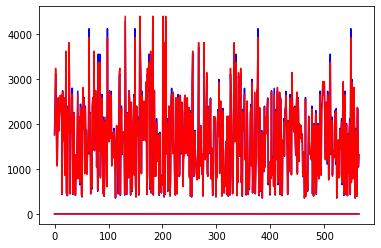

In [69]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.ensemble import ExtraTreesRegressor
best_etr = ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=10,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start=False)
best_etr.fit(X_train, Y_train)
Y_pred = best_etr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))

print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE:Runtime \n', mape_scores_runtime)
print('\nMAPE:Power \n', mape_scores_power)
